In [ ]:
#最常用的处理缺失值的方法 （后续工作）

In [ ]:
#1逻辑回归；为什么选择逻辑回归


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("./healthcare-dataset-stroke-data.csv")
df.head().append(df.tail())

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
df['stroke'].value_counts()


0    4861
1     249
Name: stroke, dtype: int64

In [14]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
Mean = df['bmi'].mean(axis=0)
#print(Mean)
df['bmi'].fillna(Mean,inplace=True)
#填充缺失值
df['bmi'].fillna(df['bmi'].mean,inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [25]:
print(df['gender'].value_counts());print('\n')
print(df['age'].value_counts());print('\n')
print(df['hypertension'].value_counts());print('\n')
print(df['heart_disease'].value_counts());print('\n')
print(df['ever_married'].value_counts());print('\n')
print(df['work_type'].value_counts());print('\n')
print(df['Residence_type'].value_counts());print('\n')
print(df['avg_glucose_level'].value_counts());print('\n')
print(df['bmi'].value_counts());print('\n')
print(df['smoking_status'].value_counts());print('\n')

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64


0    4612
1     498
Name: hypertension, dtype: int64


0    4834
1     276
Name: heart_disease, dtype: int64


Yes    3353
No     1757
Name: ever_married, dtype: int64


Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64


28.893237    201
28.700000     41
28.400000     38
27.600000     37
26.700000     37
            ... 
11.500000      1
40.600000      1
53.900000      1
97.600000      1
14.900000  

In [ ]:
# print (f'{round(df["gender"].value_counts(normalize=True)*100,2)}')
# fig = px.histogram(df, x="gender", title='Gender', width=400, height=400)
# fig.show()

In [32]:
!pip install plotly

     |████████████████████████████████| 23.9 MB 5.0 MB/s eta 0:00:01


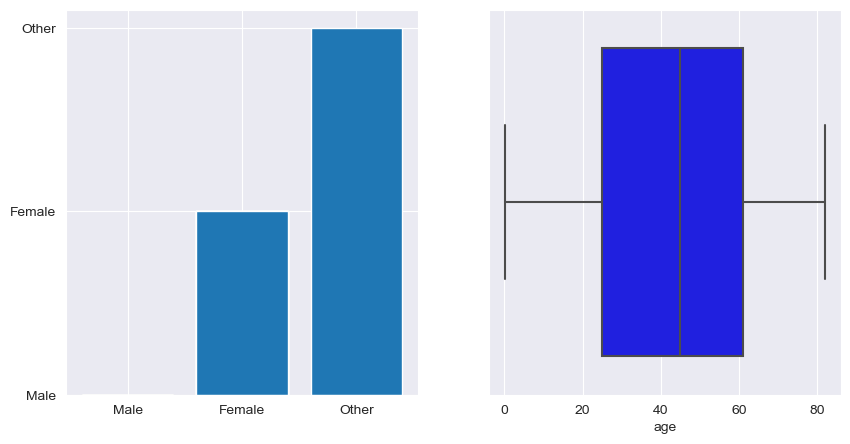

In [49]:
import matplotlib.pyplot as plt

# import plotly
# import plotly.express as px
##箱型可视化
plt.figure(figsize=(10,5))
plt.subplot(121)
#累计直方图。
# px.histogram(df, x='gender',title='Gender',width=100,height=100)  ##平均血糖水平
plt.bar(df['gender'],df['gender'])
plt.subplot(122)
sns.boxplot(x='age',data=df,color='blue')  ##bmi体重指数
plt.show()

In [ ]:
#年龄。

In [116]:
df['age'].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

In [105]:
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [118]:
df['age']

0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5110, dtype: float64

# 年龄资料
#https://yougov.co.uk/topics/politics/articles-reports/2018/03/06/how-young-are-young-people-and-what-age-does-perso


#年龄为什么这么划分

In [121]:
#https://yougov.co.uk/topics/politics/articles-reports/2018/03/06/how-young-are-young-people-and-what-age-does-perso
#年龄为什么这么划分
Youth = 0
Middle = 0
Old = 0
#29 = 以下青年。 70 = 以上老人
for i in range(len(df['age'])):
    if df['age'][i] <= 29:
        Youth +=1
    elif df['age'][i] >= 70:
        Old +=1
    else:
        Middle +=1

print(Youth, Middle,Old)

1515 2840 755


In [ ]:
#hypertension 高血压

In [ ]:
# histogram(a,bins=10,range=None,weights=None,density=False);
# # a是待统计数据的数组；
# # bins指定统计的区间个数；
# # range是一个长度为2的元组，表示统计范围的最小值和最大值，默认值None，表示范围由数据的范围决定
# # weights为数组的每个元素指定了权值,histogram()会对区间中数组所对应的权值进行求和
# # density为True时，返回每个区间的概率密度；为False，返回每个区间中元素的个数
print(df['gender'].value_counts());print('\n')
print(df['age'].value_counts());print('\n')
print(df['hypertension'].value_counts());print('\n')
print(df['heart_disease'].value_counts());print('\n')
print(df['ever_married'].value_counts());print('\n')
print(df['work_type'].value_counts());print('\n')
print(df['Residence_type'].value_counts());print('\n')
print(df['avg_glucose_level'].value_counts());print('\n')
print(df['bmi'].value_counts());print('\n')
print(df['smoking_status'].value_counts());print('\n')

In [281]:
#avg_glucose_level平均血糖水平
df['avg_glucose_level'].value_counts()


93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

In [283]:
df['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [284]:
len(df['avg_glucose_level'].unique())

3979

In [289]:
len(df['avg_glucose_level'].value_counts())

3979

#  血糖资料
理由：
正常空腹血糖浓度的预期值介于 70 mg/dL (3.9 mmol/L) 和 100 mg/dL (5.6 mmol/L) 之间。当空腹血糖介于 100 至 125 毫克/分升（5.6 至 6.9 毫摩尔/升）之间时，建议改变生活方式并监测血糖。如果在两次单独的测试中空腹血糖为 126 mg/dL (7 mmol/L) 或更高，则诊断为糖尿病。空腹血糖浓度低（低血糖）——低于 70 毫克/分升（3.9 毫摩尔/升）——会出现头晕、出汗、心悸、视力模糊和其他必须监测的症状。空腹血糖浓度升高（高血糖）是糖尿病风险较高的指标。一个人的空腹血糖 (FPG) 可能在正常范围内，因为该人没有糖尿病或因为糖尿病患者使用降糖药物进行了有效治疗。国家层面的平均 FPG 被用作促进健康饮食和行为以及治疗糖尿病的代理。

https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380

In [291]:
#正常70--100  avg_glucose_level

Hypoglycemia = 0
Normal = 0
Hyperglycaemia = 0

for i in range(len(df['avg_glucose_level'])):
    if df['avg_glucose_level'][i] < 70:
        Hypoglycemia +=1
    elif df['avg_glucose_level'][i] > 100:
        Hyperglycaemia +=1
    else:
        Normal +=1

print(Hypoglycemia, Normal,Hyperglycaemia)
#低：754； 正常 2377； 高1979

754 2377 1979


In [196]:
#hypertension
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [198]:
df['hypertension'].value_counts()[0]  #我们有498名高血压患者，约占样本的10%。


4612

In [200]:
#heart_disease
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [213]:
#ever_married
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [215]:
#work_type
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [216]:
df['work_type'].value_counts()[0]

2925

In [253]:
df['Residence_type'].value_counts() #城市 2596  农村

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
df['ever_married'].value_counts()

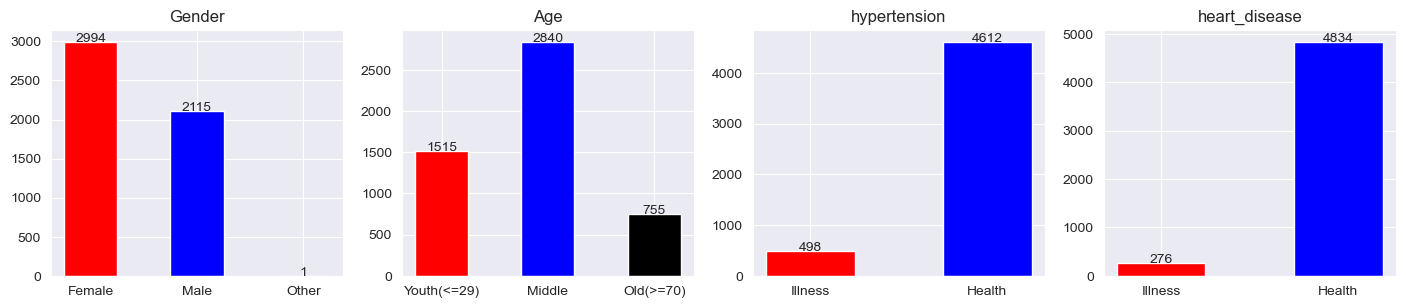

In [280]:
import matplotlib.pyplot as plt
    
# import plotly
# import plotly.express as px
##箱型可视化
plt.figure(figsize=(40,30))  #宽高。#,facecolor='pink'
plt.subplot(891)  #行列
#累计直方图。
# px.histogram(df, x='gender',title='Gender',width=100,height=100)  ##平均血糖水平
plt.title('Gender')
plt.bar('Female',df['gender'].value_counts()[0], color='red',width=0.5)
plt.bar('Male',df['gender'].value_counts()[1], color='b',width=0.5)
plt.bar('Other',df['gender'].value_counts()[2], color='black',width=0.5)
plt.text('Female',df['gender'].value_counts()[0],str(df['gender'].value_counts()[0]), ha='center')
plt.text('Male',df['gender'].value_counts()[1],str(df['gender'].value_counts()[1]), ha='center')
plt.text('Other',df['gender'].value_counts()[2],str(df['gender'].value_counts()[2]), ha='center')



plt.subplot(892)
plt.title('Age')
plt.bar('Youth(<=29)',Youth, color='r',width=0.5)
plt.bar('Middle',Middle, color='b',width=0.5)
plt.bar('Old(>=70)',Old, color='black',width=0.5)
plt.text('Youth(<=29)',Youth,str(Youth), ha='center')
plt.text('Middle',Middle,str(Middle), ha='center')
plt.text('Old(>=70)',Old,str(Old), ha='center')



plt.subplot(893)
plt.title('hypertension')
plt.bar('Illness',df['hypertension'].value_counts()[1], color='r',width=0.5)
plt.bar('Health',df['hypertension'].value_counts()[0], color='b',width=0.5)
plt.text('Illness',df['hypertension'].value_counts()[1],str(df['hypertension'].value_counts()[1]), ha='center')
plt.text('Health',df['hypertension'].value_counts()[0],str(df['hypertension'].value_counts()[0]), ha='center')


# plt.legend(loc="upper right")
#sns.boxplot(x='age',data=df,color='blue')  ##bmi体重指数
plt.subplot(894)
plt.title('heart_disease')
plt.bar('Illness',df['heart_disease'].value_counts()[1], color='r',width=0.5)
plt.bar('Health',df['heart_disease'].value_counts()[0], color='b',width=0.5)
plt.text('Illness',df['heart_disease'].value_counts()[1],str(df['heart_disease'].value_counts()[1]), ha='center')
plt.text('Health',df['heart_disease'].value_counts()[0],str(df['heart_disease'].value_counts()[0]), ha='center')



# plt.subplot(665)
# plt.title('work_type')
# plt.bar('Private',df['work_type'].value_counts()[0], color='r',width=0.5)
# plt.bar('Self-employed',df['work_type'].value_counts()[1], color='b',width=0.5)
# plt.bar('children',df['work_type'].value_counts()[2], color='black',width=0.5)
# plt.bar('Govt_job',df['work_type'].value_counts()[3], color='y',width=0.5)
# plt.bar('Never_worked',df['work_type'].value_counts()[4], color='pink',width=0.5)
# #私人 2925自营职业者 819儿童 687 政府工作 657 从未工作
# plt.text('Private',df['work_type'].value_counts()[1],str(df['work_type'].value_counts()[1]), ha='center')
# plt.text('Self-employed',df['work_type'].value_counts()[0],str(df['work_type'].value_counts()[0]), ha='center')
# plt.text('children',df['work_type'].value_counts()[1],str(df['work_type'].value_counts()[1]), ha='center')
# plt.text('Govt_job',df['work_type'].value_counts()[0],str(df['work_type'].value_counts()[0]), ha='center')
# plt.text('Never_worked',df['work_type'].value_counts()[1],str(df['work_type'].value_counts()[1]), ha='center')



plt.show()

In [311]:
#< 18.5 体重不足； 18.5-24.9 正常。 25-29.9 超重； >30 肥胖。
#Thin
Thin = 0
normal = 0
Overweight = 0
Obese = 0

for i in range(len(df['bmi'])):
    if df['bmi'][i] < 18.5:
        Thin +=1
    elif 18.5 <= df['bmi'][i] < 25:
        normal +=1
    elif 25 <= df['bmi'][i] < 30:
        Overweight +=1
    else:
        Obese

print(Thin, normal,Overweight,Obese)
#体重不足337 ；  正常 1243 。 超重；1610  肥胖。0

337 1243 1610 0


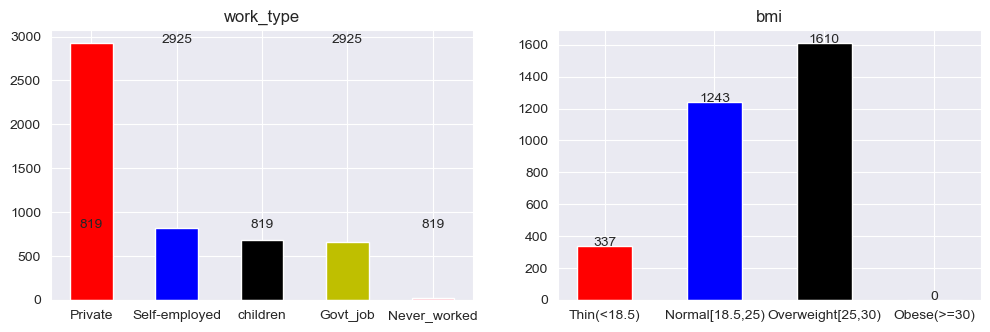

In [314]:
plt.figure(figsize=(12,3.5))  #宽高。#,facecolor='pink'
plt.subplot(121)  #

plt.title('work_type')
plt.bar('Private',df['work_type'].value_counts()[0], color='r',width=0.5)
plt.bar('Self-employed',df['work_type'].value_counts()[1], color='b',width=0.5)
plt.bar('children',df['work_type'].value_counts()[2], color='black',width=0.5)
plt.bar('Govt_job',df['work_type'].value_counts()[3], color='y',width=0.5)
plt.bar('Never_worked',df['work_type'].value_counts()[4], color='pink',width=0.5)
#私人 2925自营职业者 819儿童 687 政府工作 657 从未工作
plt.text('Private',df['work_type'].value_counts()[1],str(df['work_type'].value_counts()[1]), ha='center')
plt.text('Self-employed',df['work_type'].value_counts()[0],str(df['work_type'].value_counts()[0]), ha='center')
plt.text('children',df['work_type'].value_counts()[1],str(df['work_type'].value_counts()[1]), ha='center')
plt.text('Govt_job',df['work_type'].value_counts()[0],str(df['work_type'].value_counts()[0]), ha='center')
plt.text('Never_worked',df['work_type'].value_counts()[1],str(df['work_type'].value_counts()[1]), ha='center')


plt.subplot(122)  #

plt.title('bmi')
plt.bar('Thin(<18.5)',Thin, color='r',width=0.5)
plt.bar('Normal[18.5,25)',normal, color='b',width=0.5)
plt.bar('Overweight[25,30)',Overweight, color='black',width=0.5)
plt.bar('Obese(>=30)',Obese, color='y',width=0.5)


plt.text('Thin(<18.5)',Thin,str(Thin), ha='center')
plt.text('Normal[18.5,25)',normal,str(normal), ha='center')
plt.text('Overweight[25,30)',Overweight,str(Overweight), ha='center')
plt.text('Obese(>=30)',Obese,str(Obese), ha='center')




plt.show()

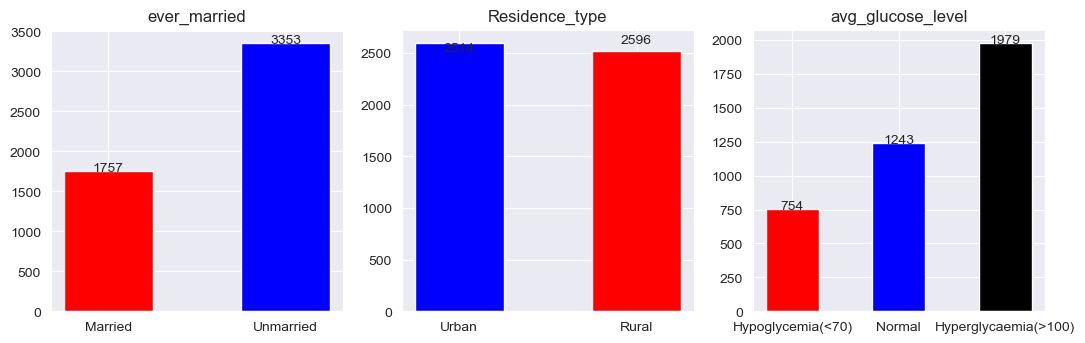

In [315]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40,30))
#3353 people have been married and 1757 people are not married before.
plt.subplot(791)
plt.title('ever_married')
plt.bar('Married',df['ever_married'].value_counts()[1], color='r',width=0.5)
plt.bar('Unmarried',df['ever_married'].value_counts()[0], color='b',width=0.5)
plt.text('Married',df['ever_married'].value_counts()[1],str(df['ever_married'].value_counts()[1]), ha='center')
plt.text('Unmarried',df['ever_married'].value_counts()[0],str(df['ever_married'].value_counts()[0]), ha='center')


plt.subplot(792)
plt.title('Residence_type')
plt.bar('Urban',df['Residence_type'].value_counts()[0], color='b',width=0.5)
plt.bar('Rural',df['Residence_type'].value_counts()[1], color='r',width=0.5)
plt.text('Urban',df['Residence_type'].value_counts()[1],str(df['Residence_type'].value_counts()[1]), ha='center')
plt.text('Rural',df['Residence_type'].value_counts()[0],str(df['Residence_type'].value_counts()[0]), ha='center')

plt.subplot(793)
plt.title('avg_glucose_level')
plt.bar('Hypoglycemia(<70)',Hypoglycemia, color='r',width=0.5)
plt.bar('Normal',Normal, color='b',width=0.5)
plt.bar('Hyperglycaemia(>100)',Hyperglycaemia, color='black',width=0.5)
plt.text('Hypoglycemia(<70)',Hypoglycemia,str(Hypoglycemia), ha='center')
plt.text('Normal',Normal,str(Normal), ha='center')
plt.text('Hyperglycaemia(>100)',Hyperglycaemia,str(Hyperglycaemia), ha='center')

plt.show()

# 澳洲政府给出的BMI算法
https://healthyweight.health.gov.au/wps/portal/Home/get-started/are-you-a-healthy-weight/bmi/

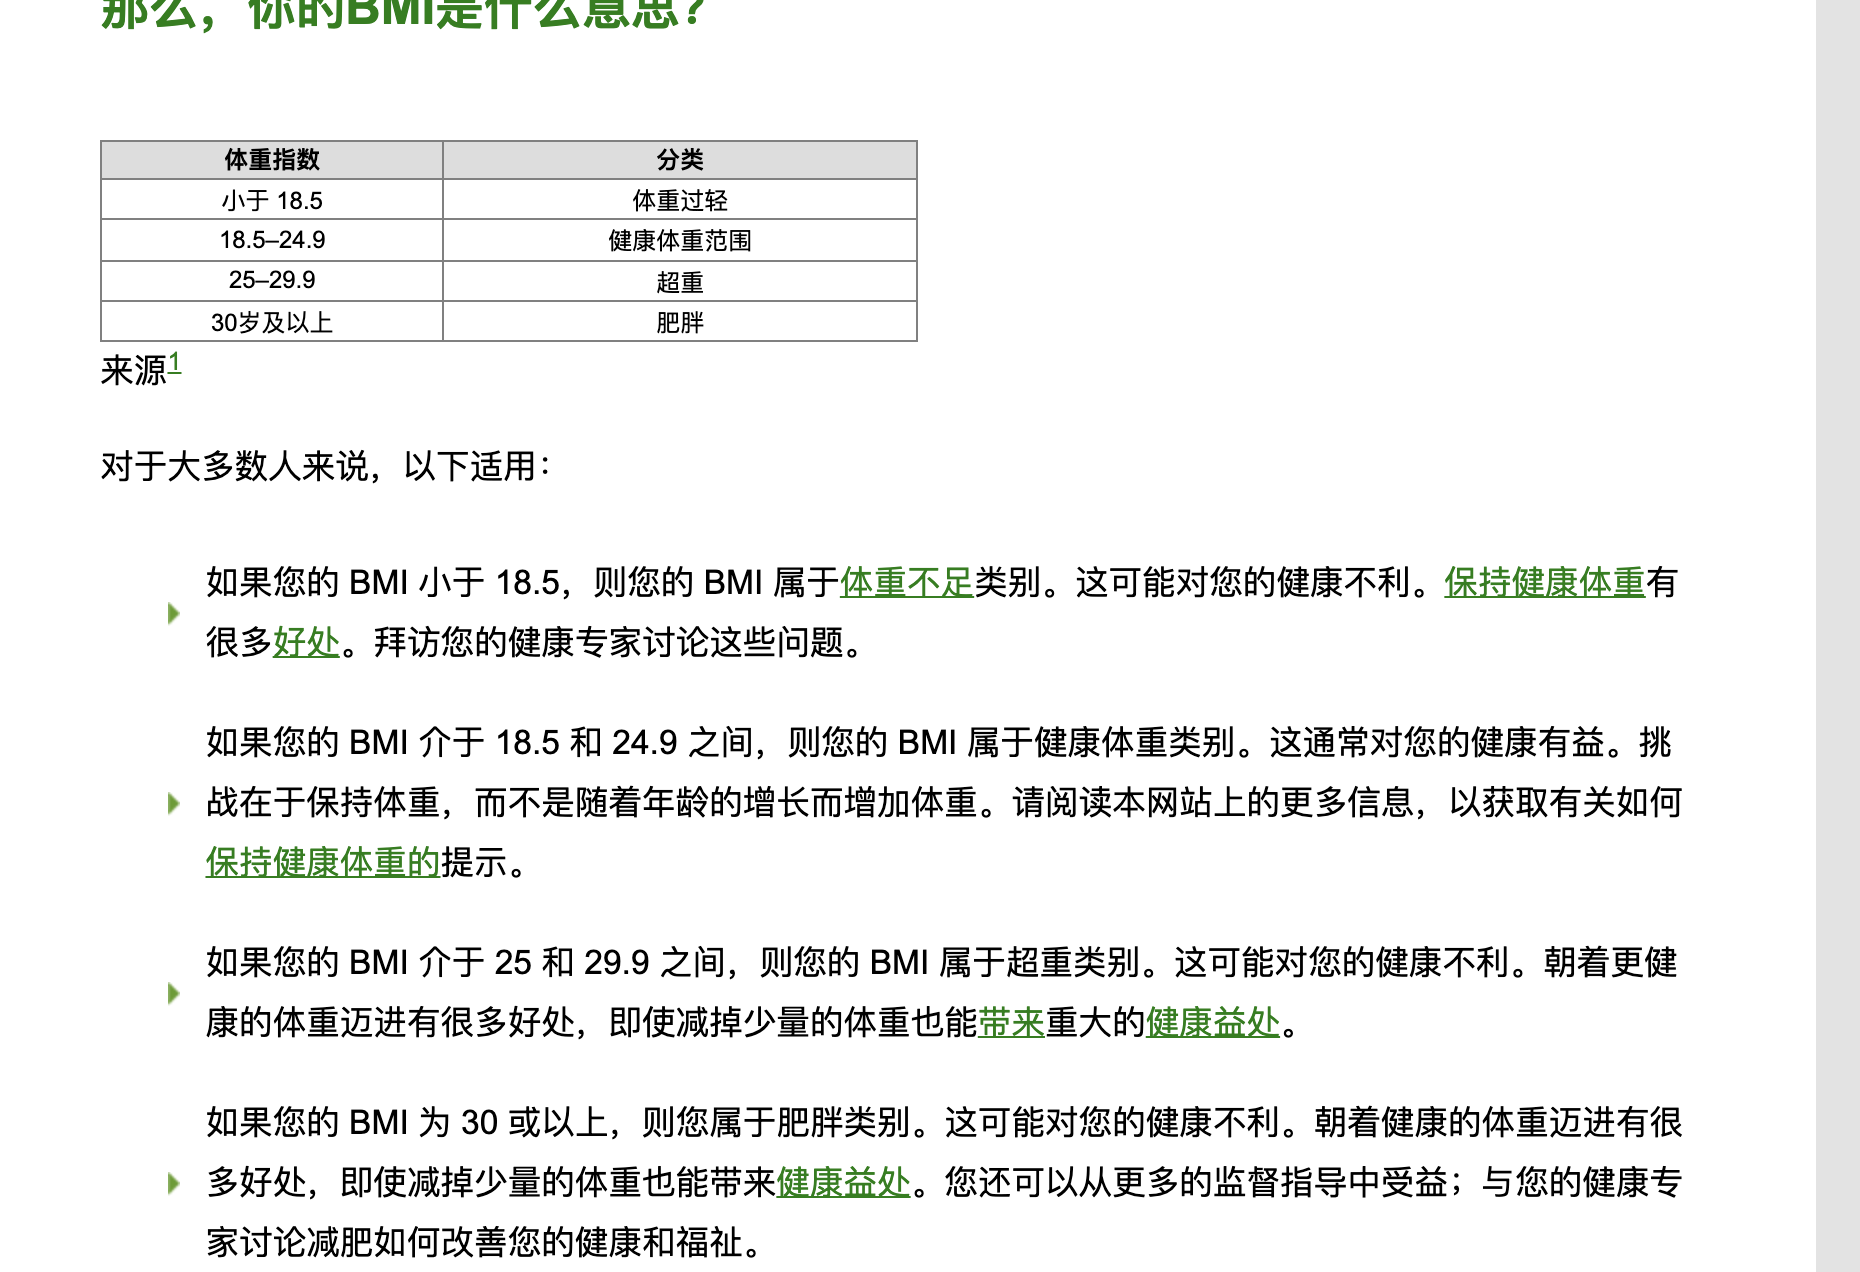


In [308]:
#< 18.5 体重不足； 18.5-24.9 正常。 25-29.9 超重； >30 肥胖。
#Thin
Thin = 0
normal = 0
Overweight = 0
Obese = 0

for i in range(len(df['bmi'])):
    if df['bmi'][i] < 18.5:
        Thin +=1
    elif 18.5 <= df['bmi'][i] < 25:
        normal +=1
    elif 25 <= df['bmi'][i] < 30:
        Overweight +=1
    else:
        Obese

print(Thin, normal,Overweight,Obese)
#体重不足337 ；  正常 1243 。 超重；1610  肥胖。0

337 1243 1610 0


In [316]:

#print(df['smoking_status'].value_counts());print('\n')
#smoking_status
df['smoking_status']

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109            Unknown
Name: smoking_status, Length: 5110, dtype: object

In [317]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
plt.subplot(794)
plt.title('smoking_status')
plt.bar('never',df['smoking_status'].value_counts()[0], color='r',width=0.5)
plt.bar('Unknown',df['smoking_status'].value_counts()[1], color='b',width=0.5)
plt.bar('formerly',df['smoking_status'].value_counts()[2], color='black',width=0.5)
plt.bar('smokes',df['smoking_status'].value_counts()[3], color='black',width=0.5)

plt.text('never',df['smoking_status'].value_counts()[0],str(df['smoking_status'].value_counts()[0]), ha='center')
plt.text('Unknown',df['smoking_status'].value_counts()[1],str(df['smoking_status'].value_counts()[1]), ha='center')
plt.text('formerly',df['smoking_status'].value_counts()[2],str(df['smoking_status'].value_counts()[2]), ha='center')
plt.text('smokes',df['smoking_status'].value_counts()[3],str(Normal), ha='center')


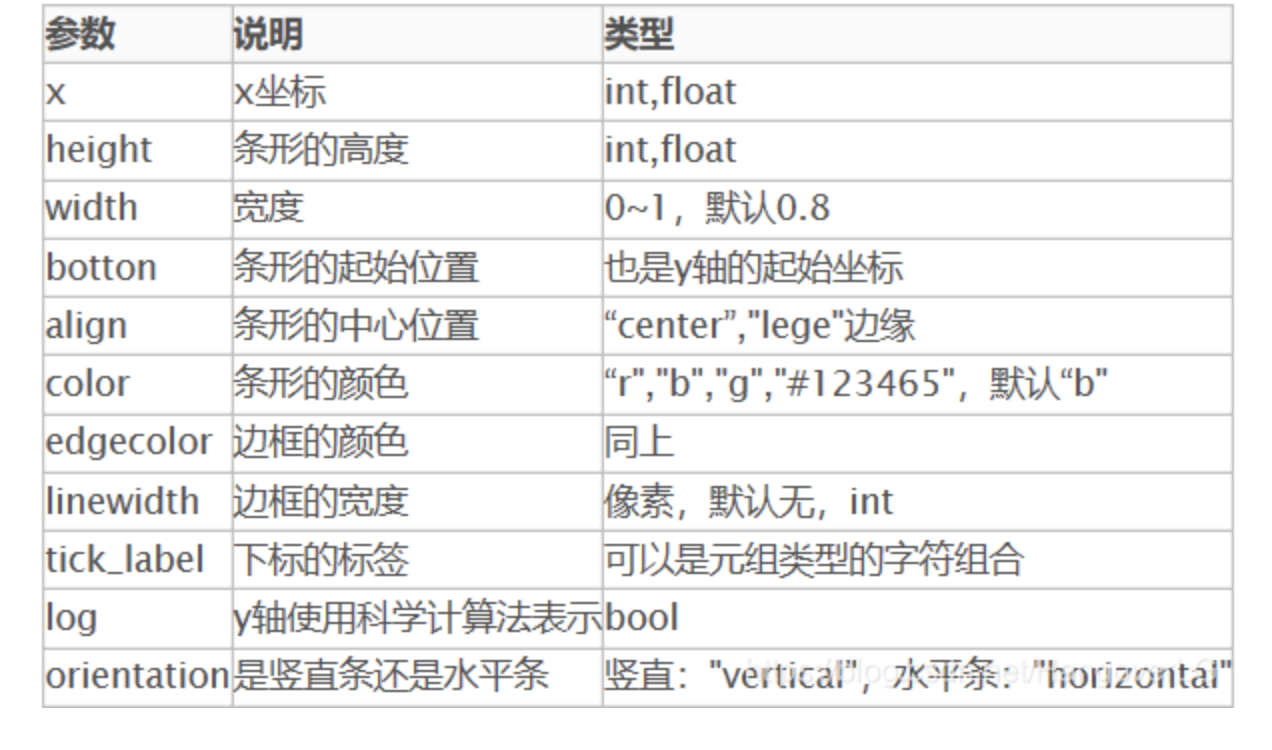 

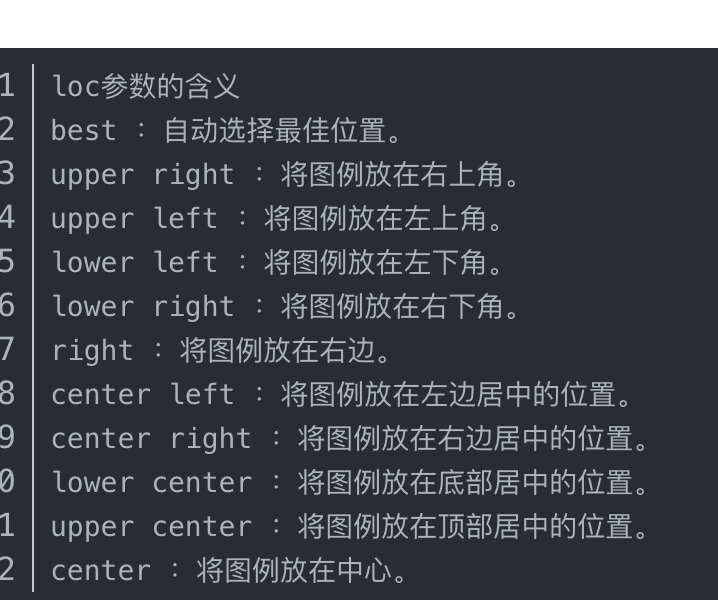

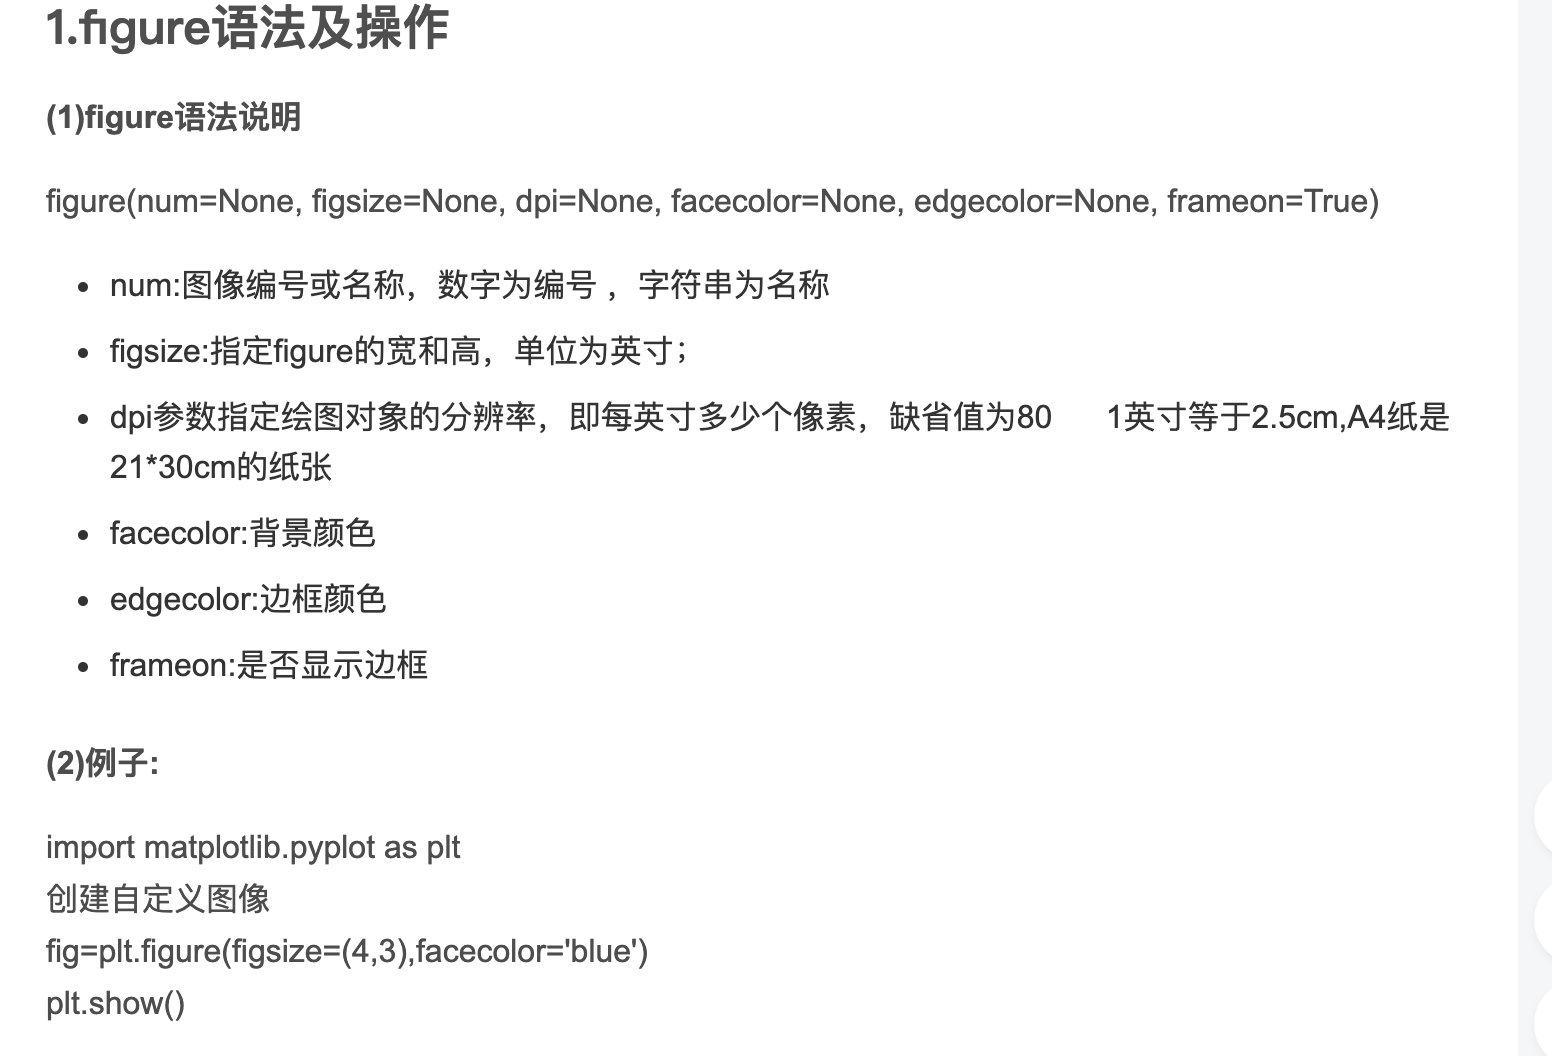

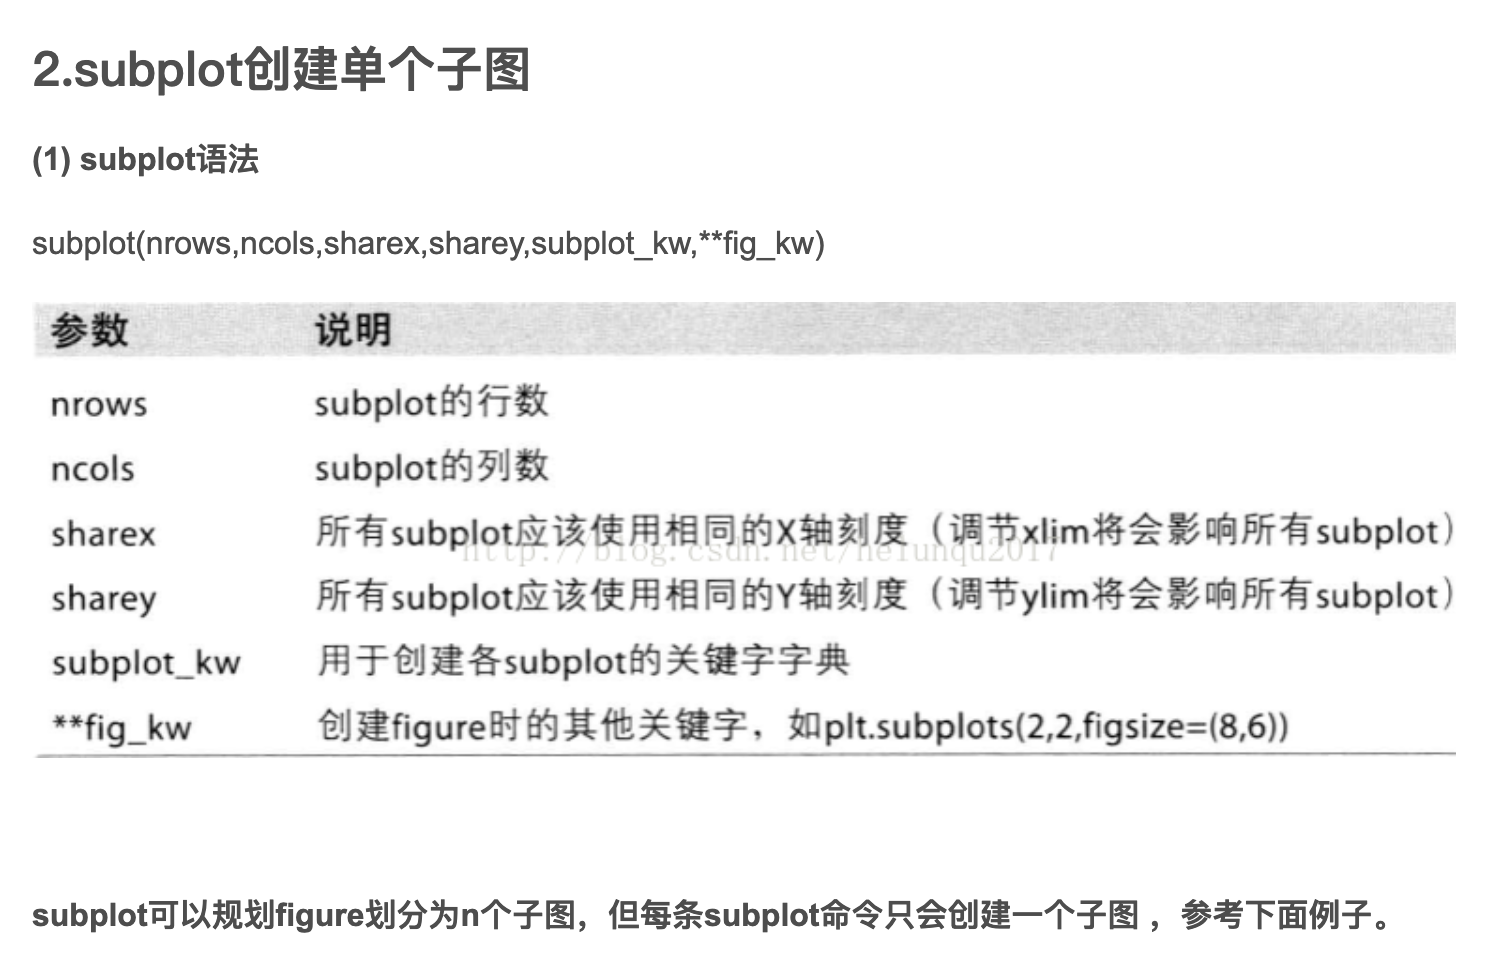

#图中图
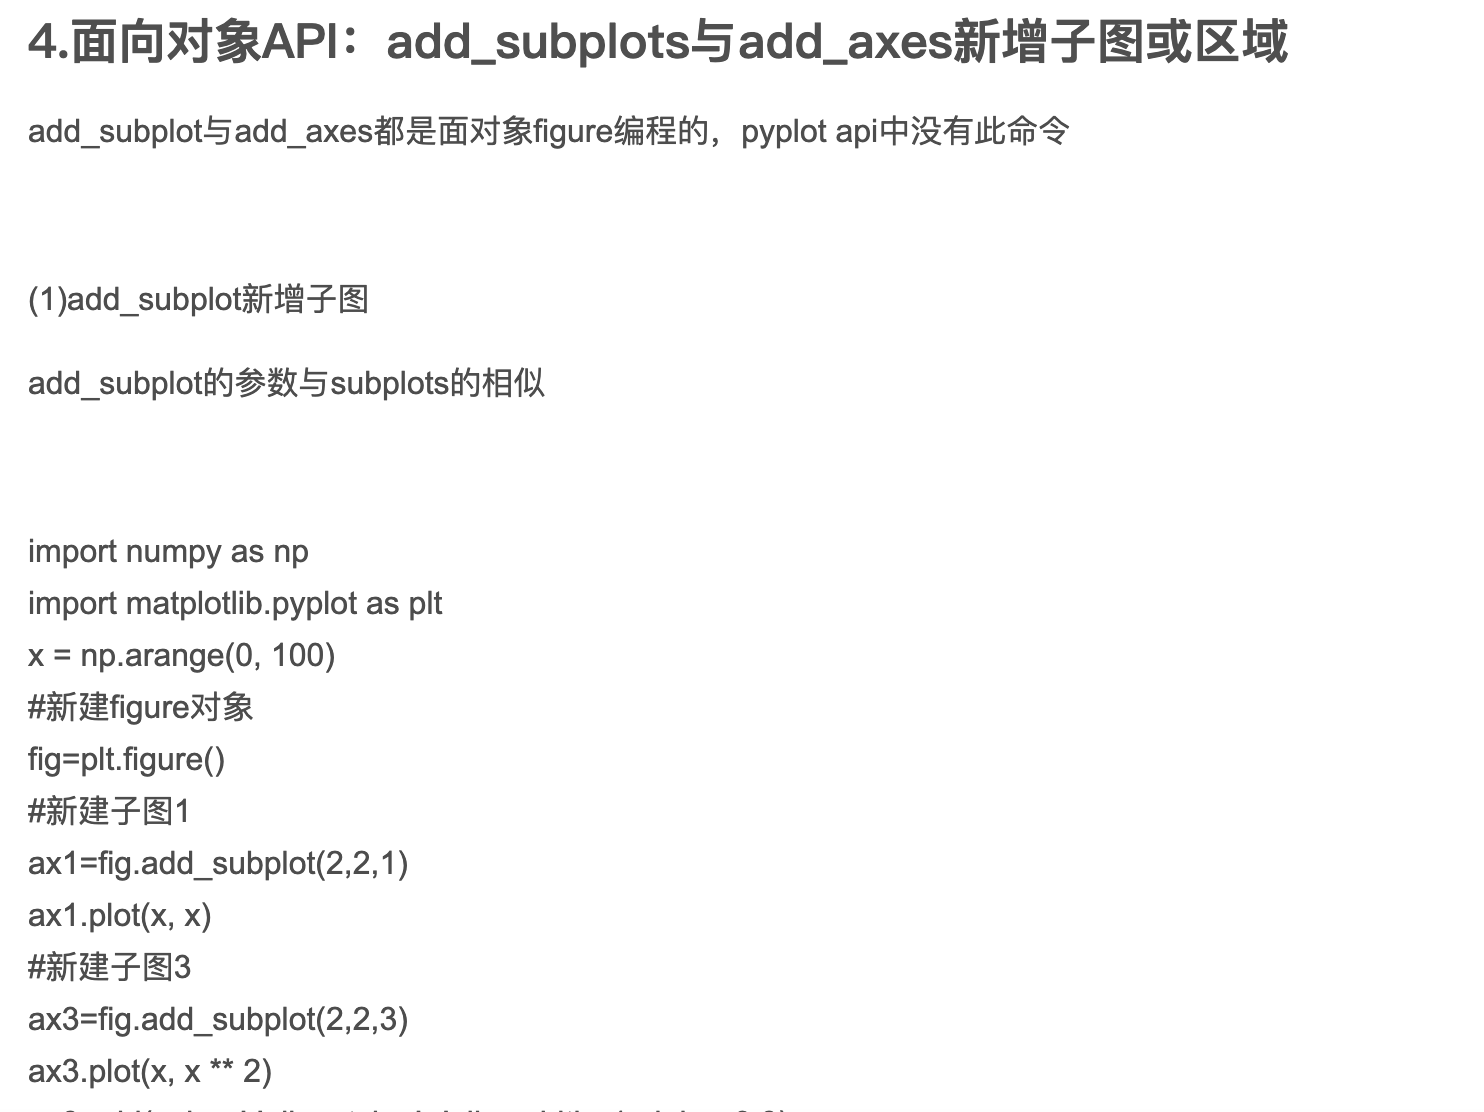

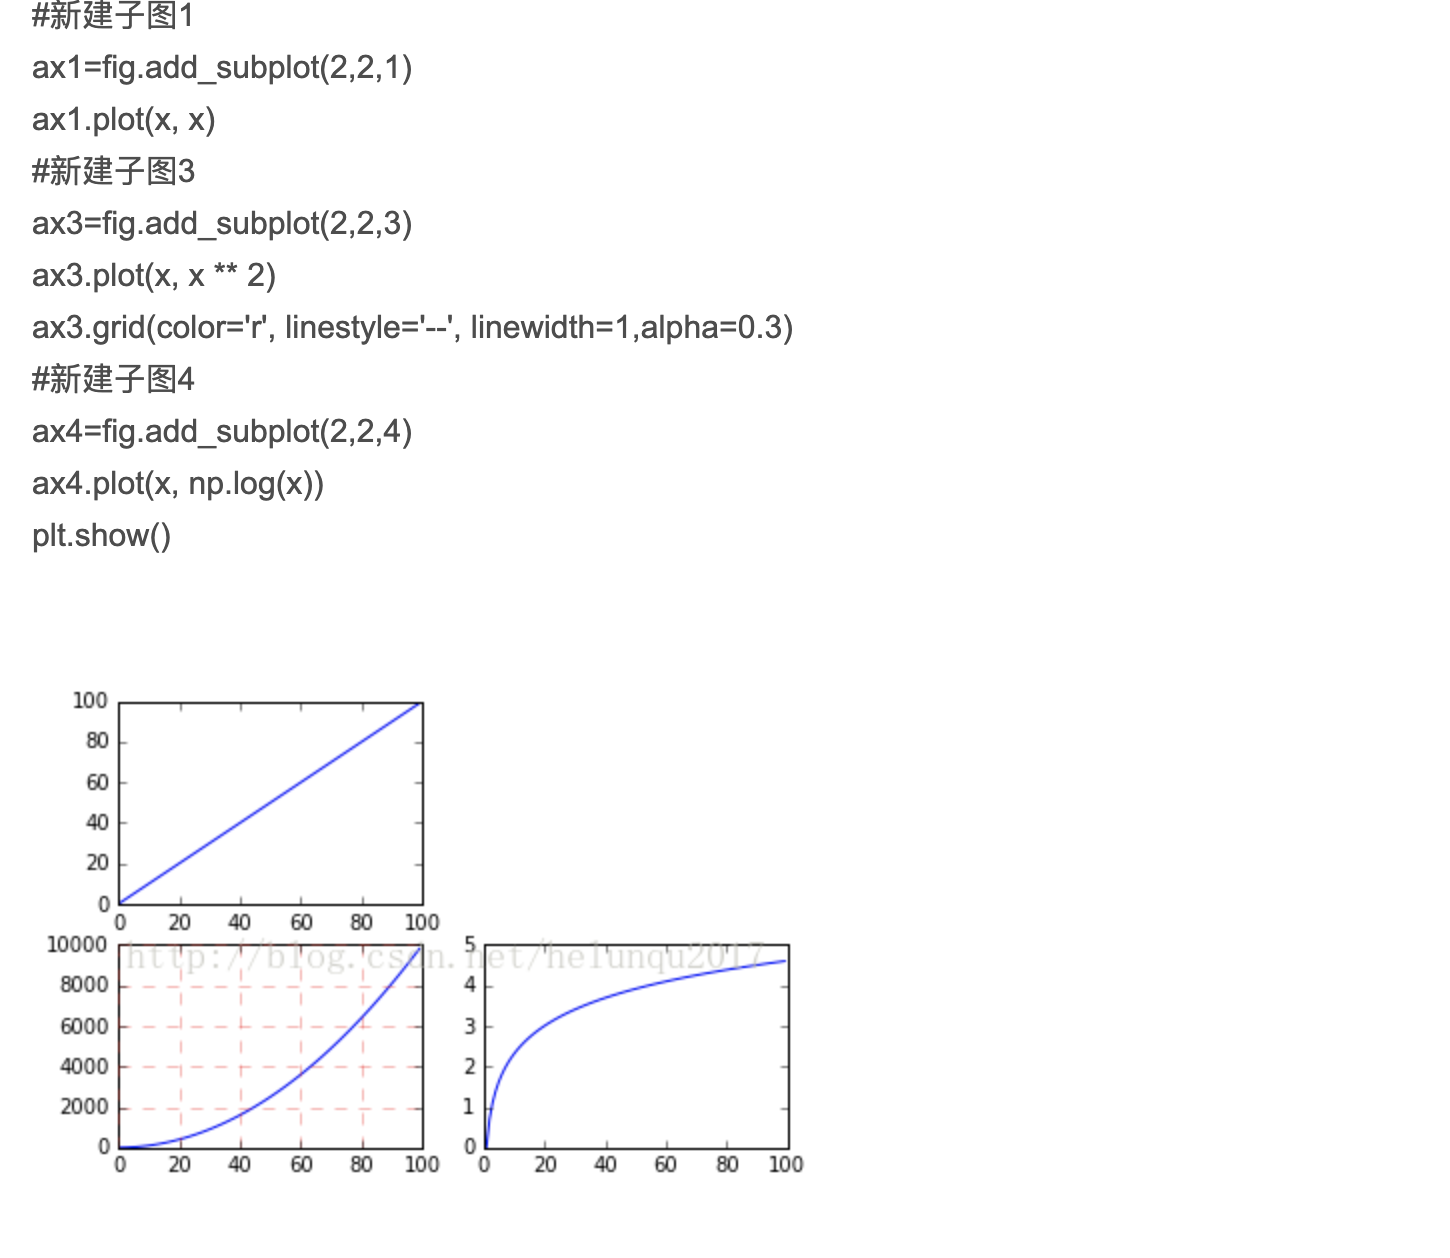

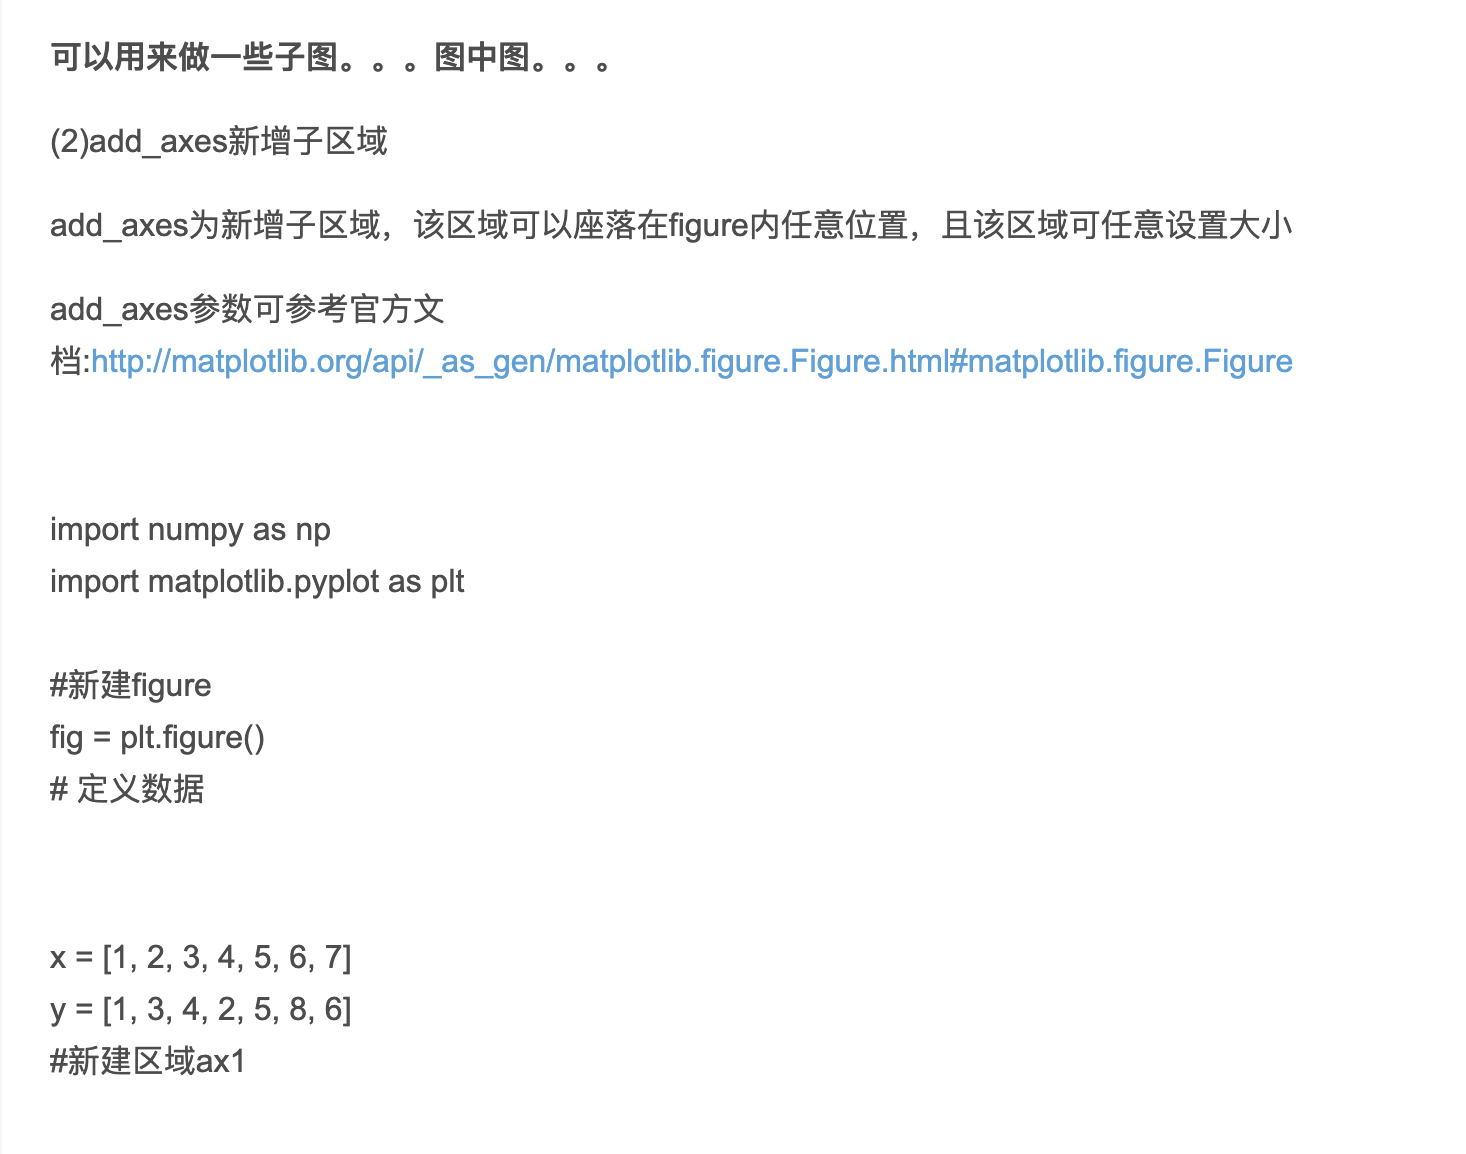

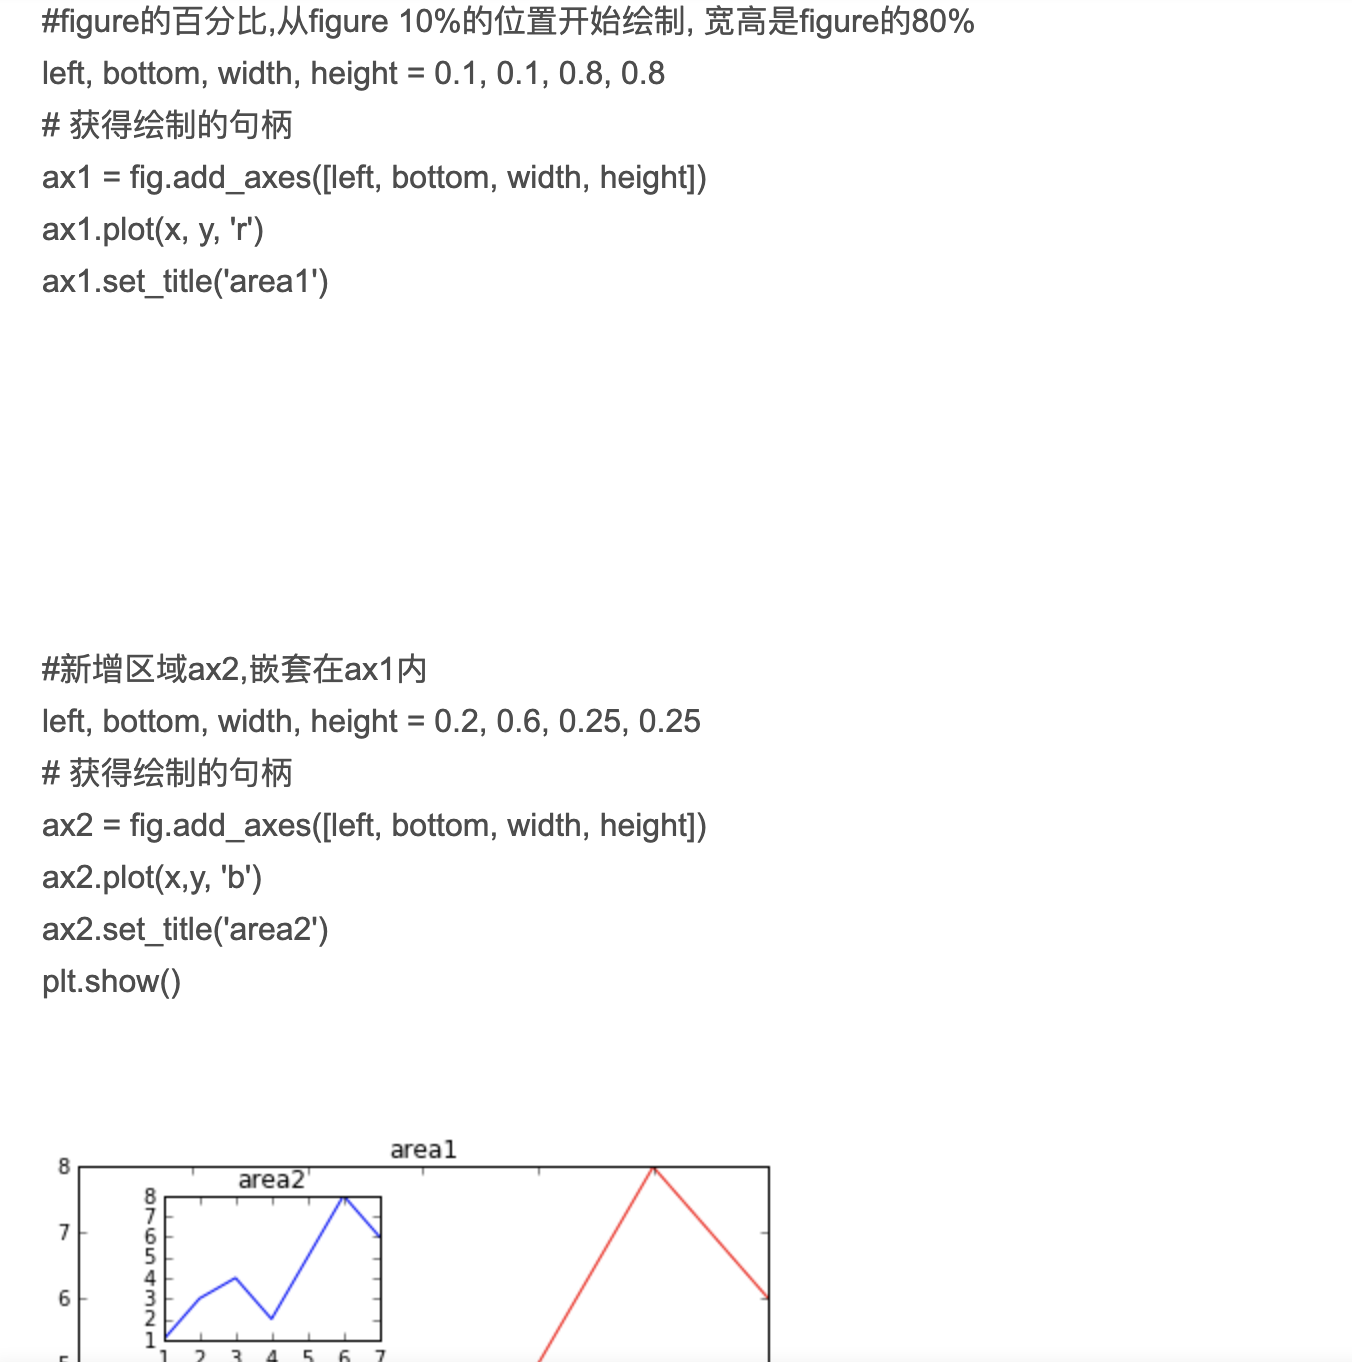

In [84]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [85]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [73]:
df['gender'].index

RangeIndex(start=0, stop=5110, step=1)

In [74]:
df.index

RangeIndex(start=0, stop=5110, step=1)

In [77]:
df['gender'].columns

AttributeError: 'Series' object has no attribute 'columns'

In [78]:
df.columns #获取列标签

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [79]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
#一、数据清洗
#Python科学计算库 — Pandas数学统计方法
#https://blog.csdn.net/u010155987/article/details/84641110?ops_request_misc=&request_id=&biz_id=102&utm_term=df.discribe&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-5-84641110.first_rank_v2_pc_rank_v29&spm=1018.2226.3001.4187


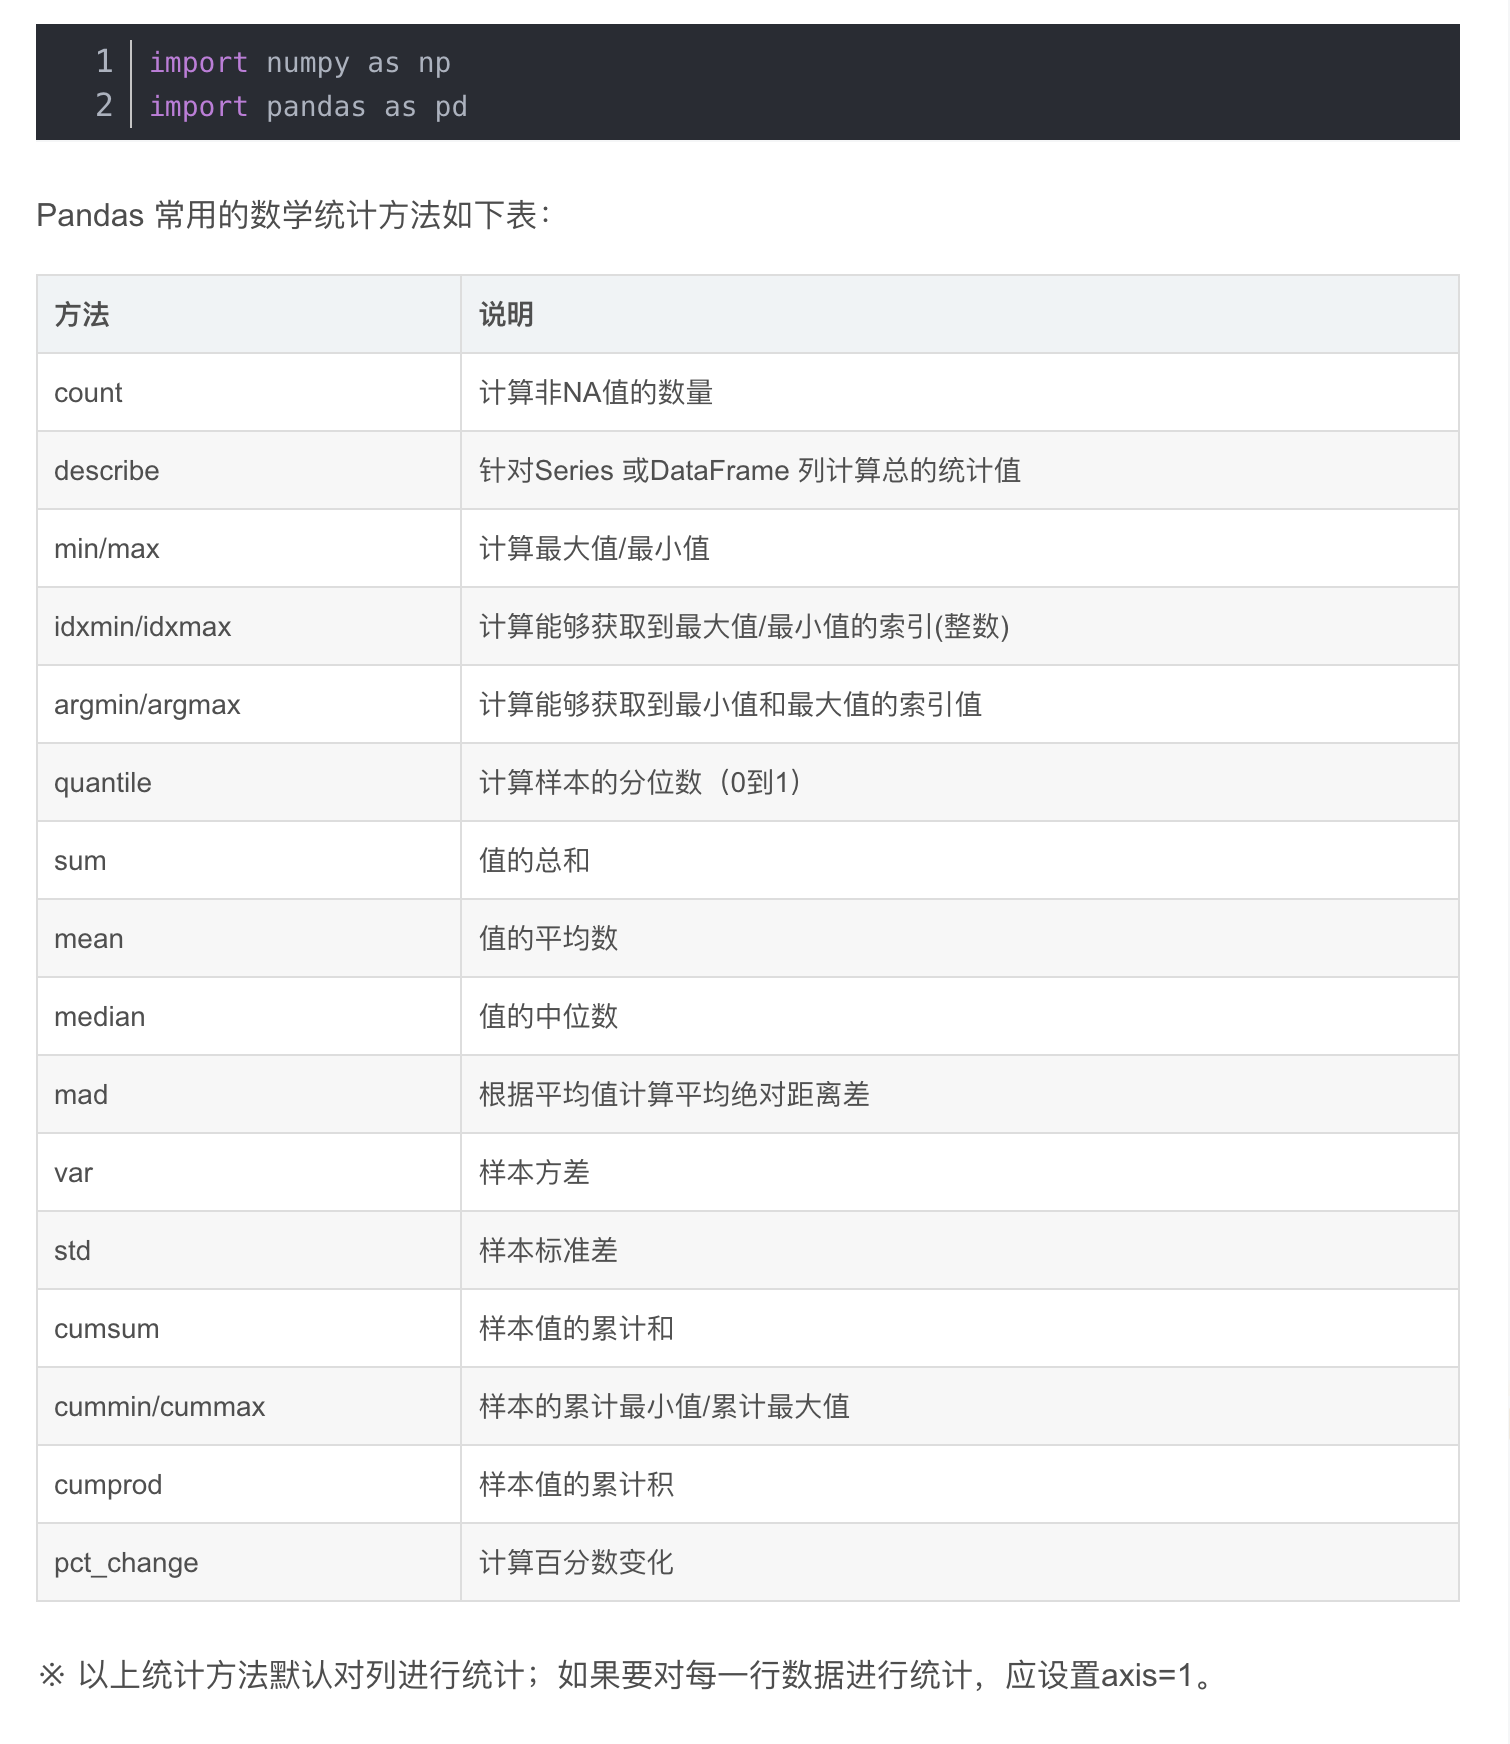

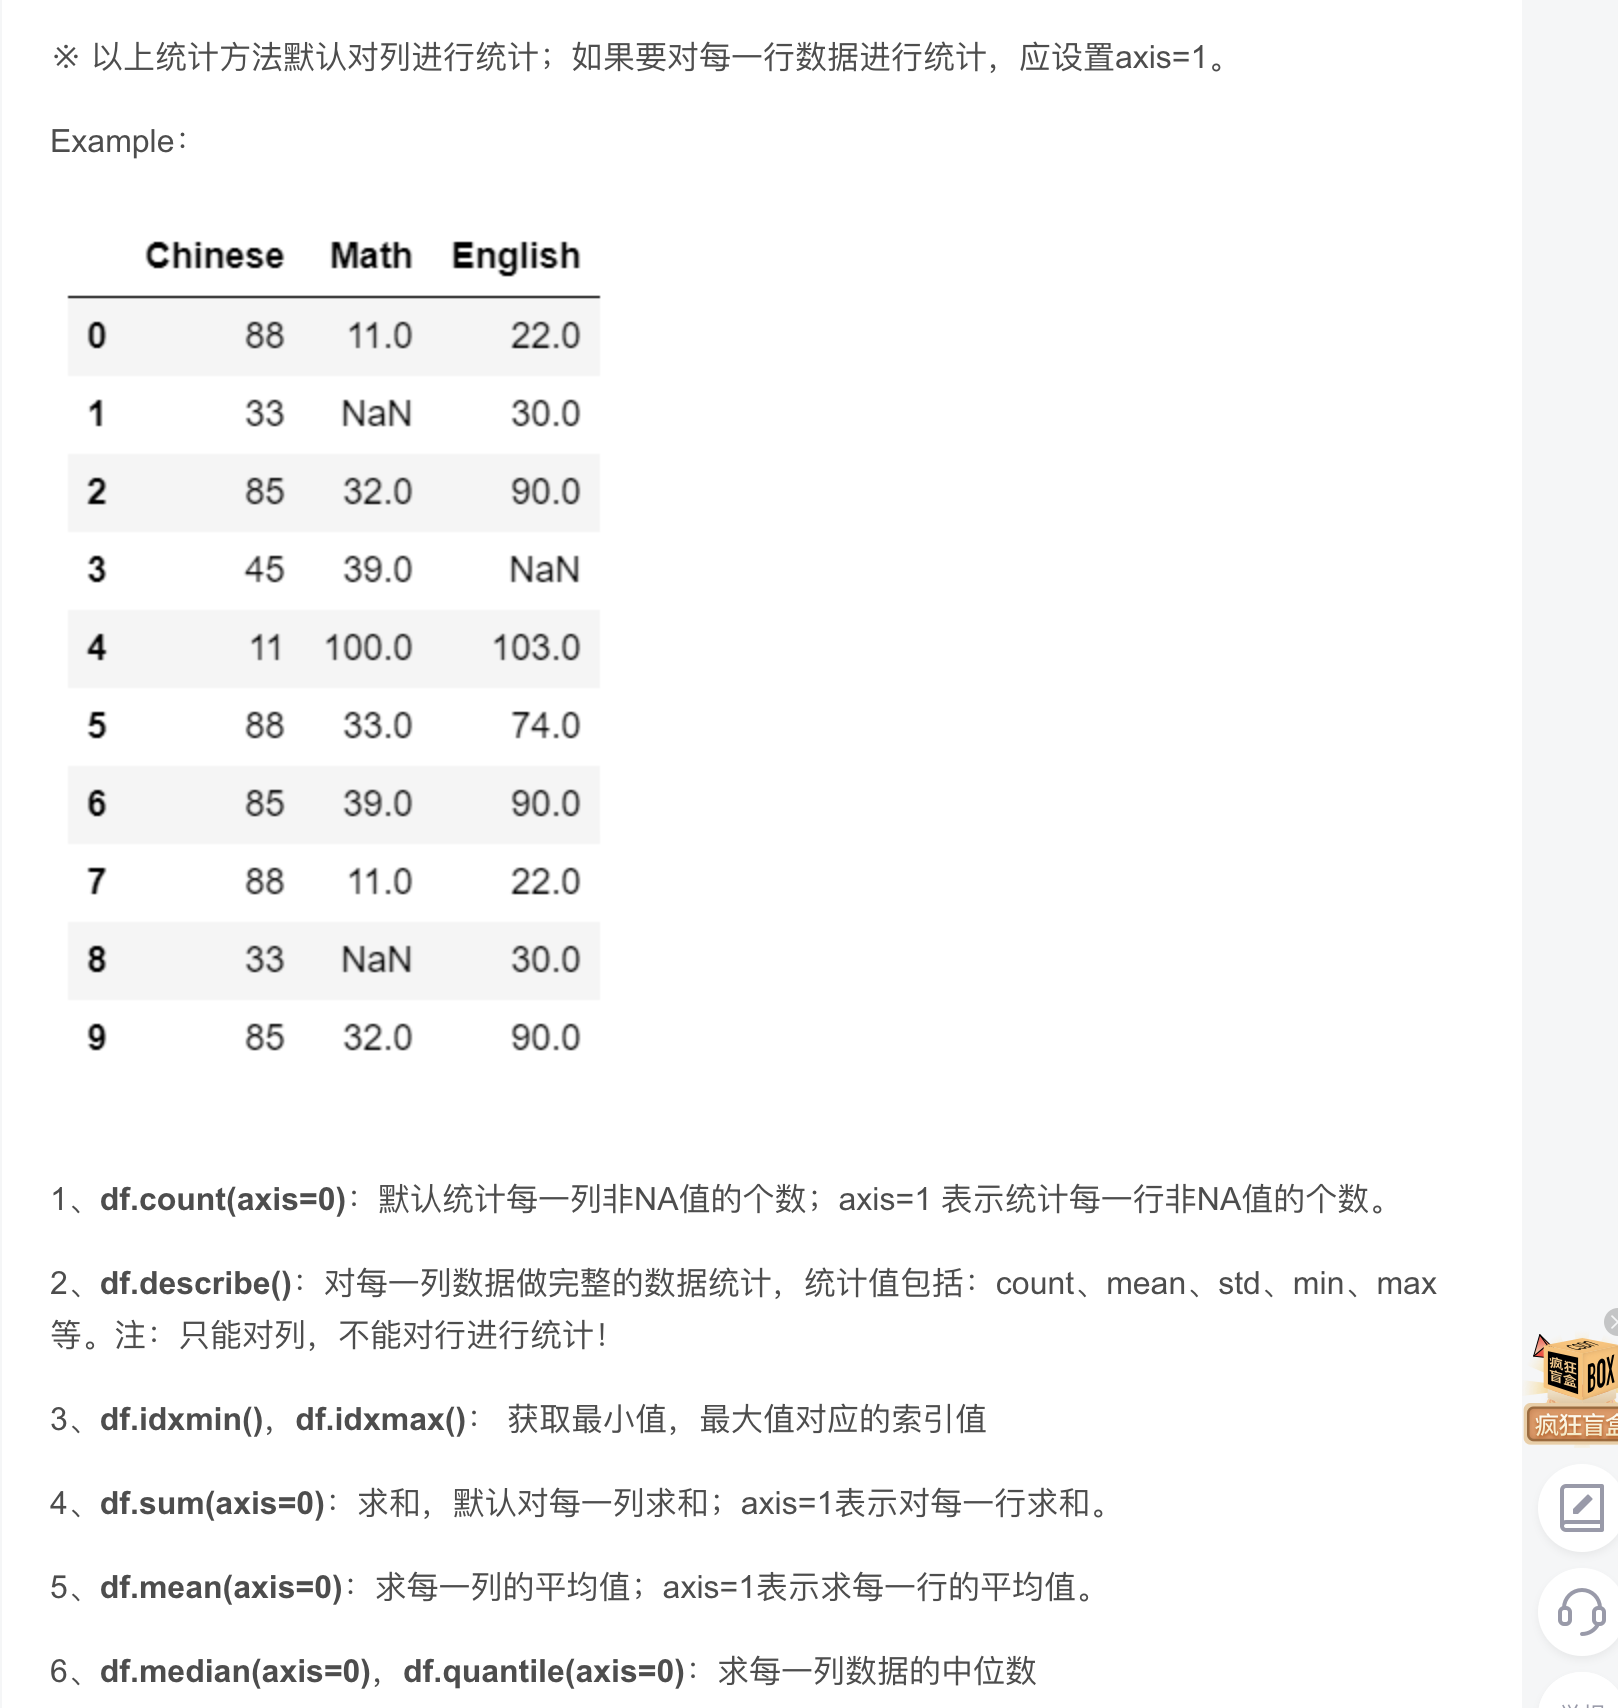

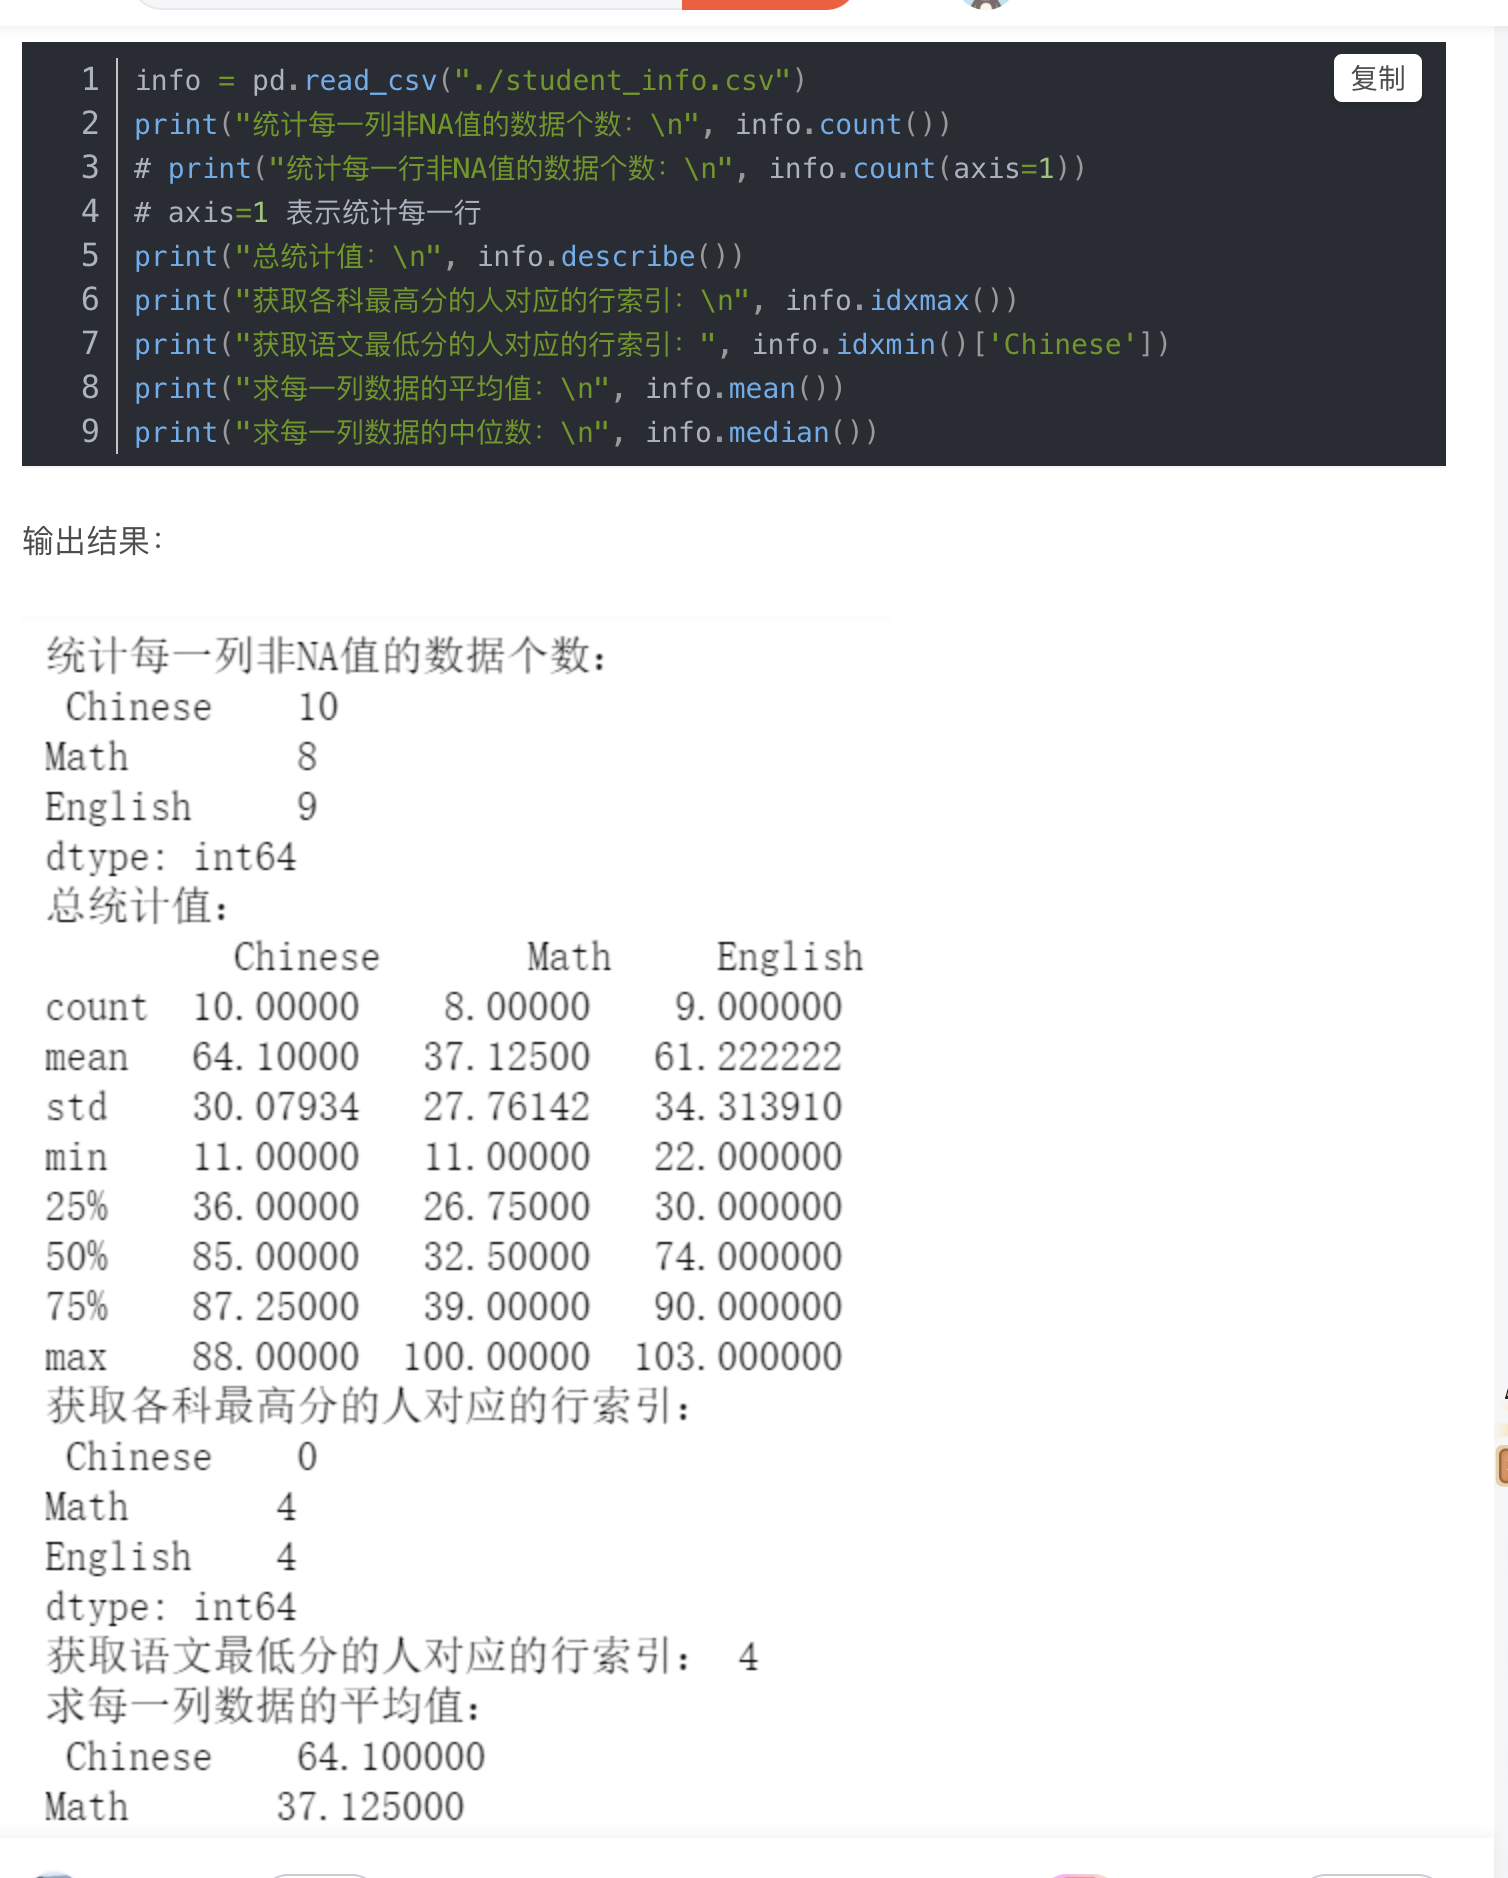

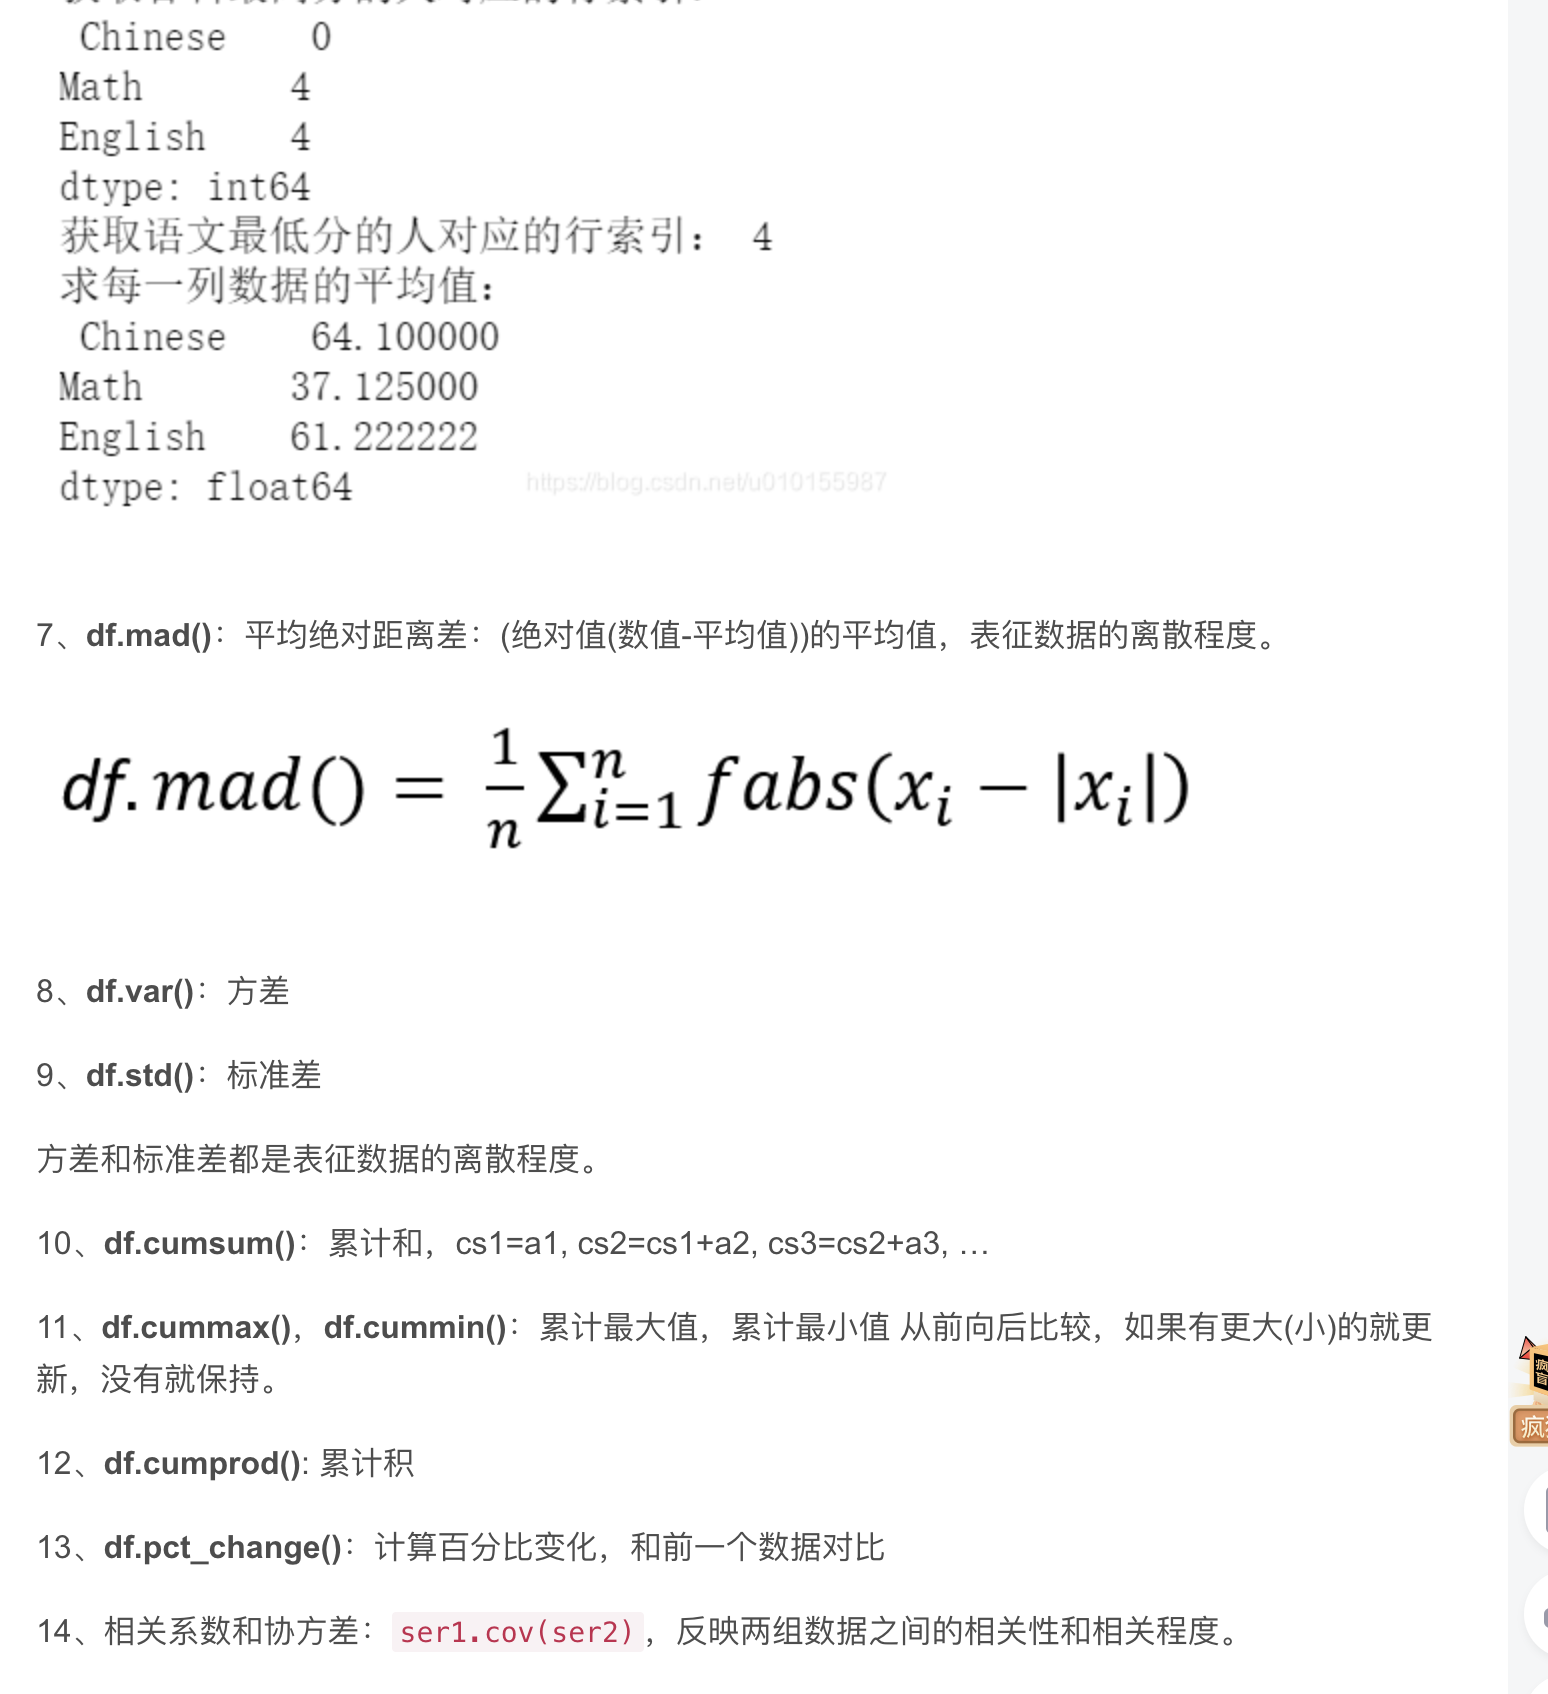

In [ ]:
# #pandas学习之df.fillna
# https://blog.csdn.net/lisnyuan/article/details/107051836?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522163038617816780262582808%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=163038617816780262582808&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v29_ecpm-1-107051836.first_rank_v2_pc_rank_v29&utm_term=df.fillna%28%29%E6%8C%87%E5%AE%9A%E5%88%97%E5%A1%AB%E5%85%85&spm=1018.2226.3001.4187
#inplace = True加入参数，这样才能让源数据发生改变并保存。

# 跑出个基础来，然后画图；

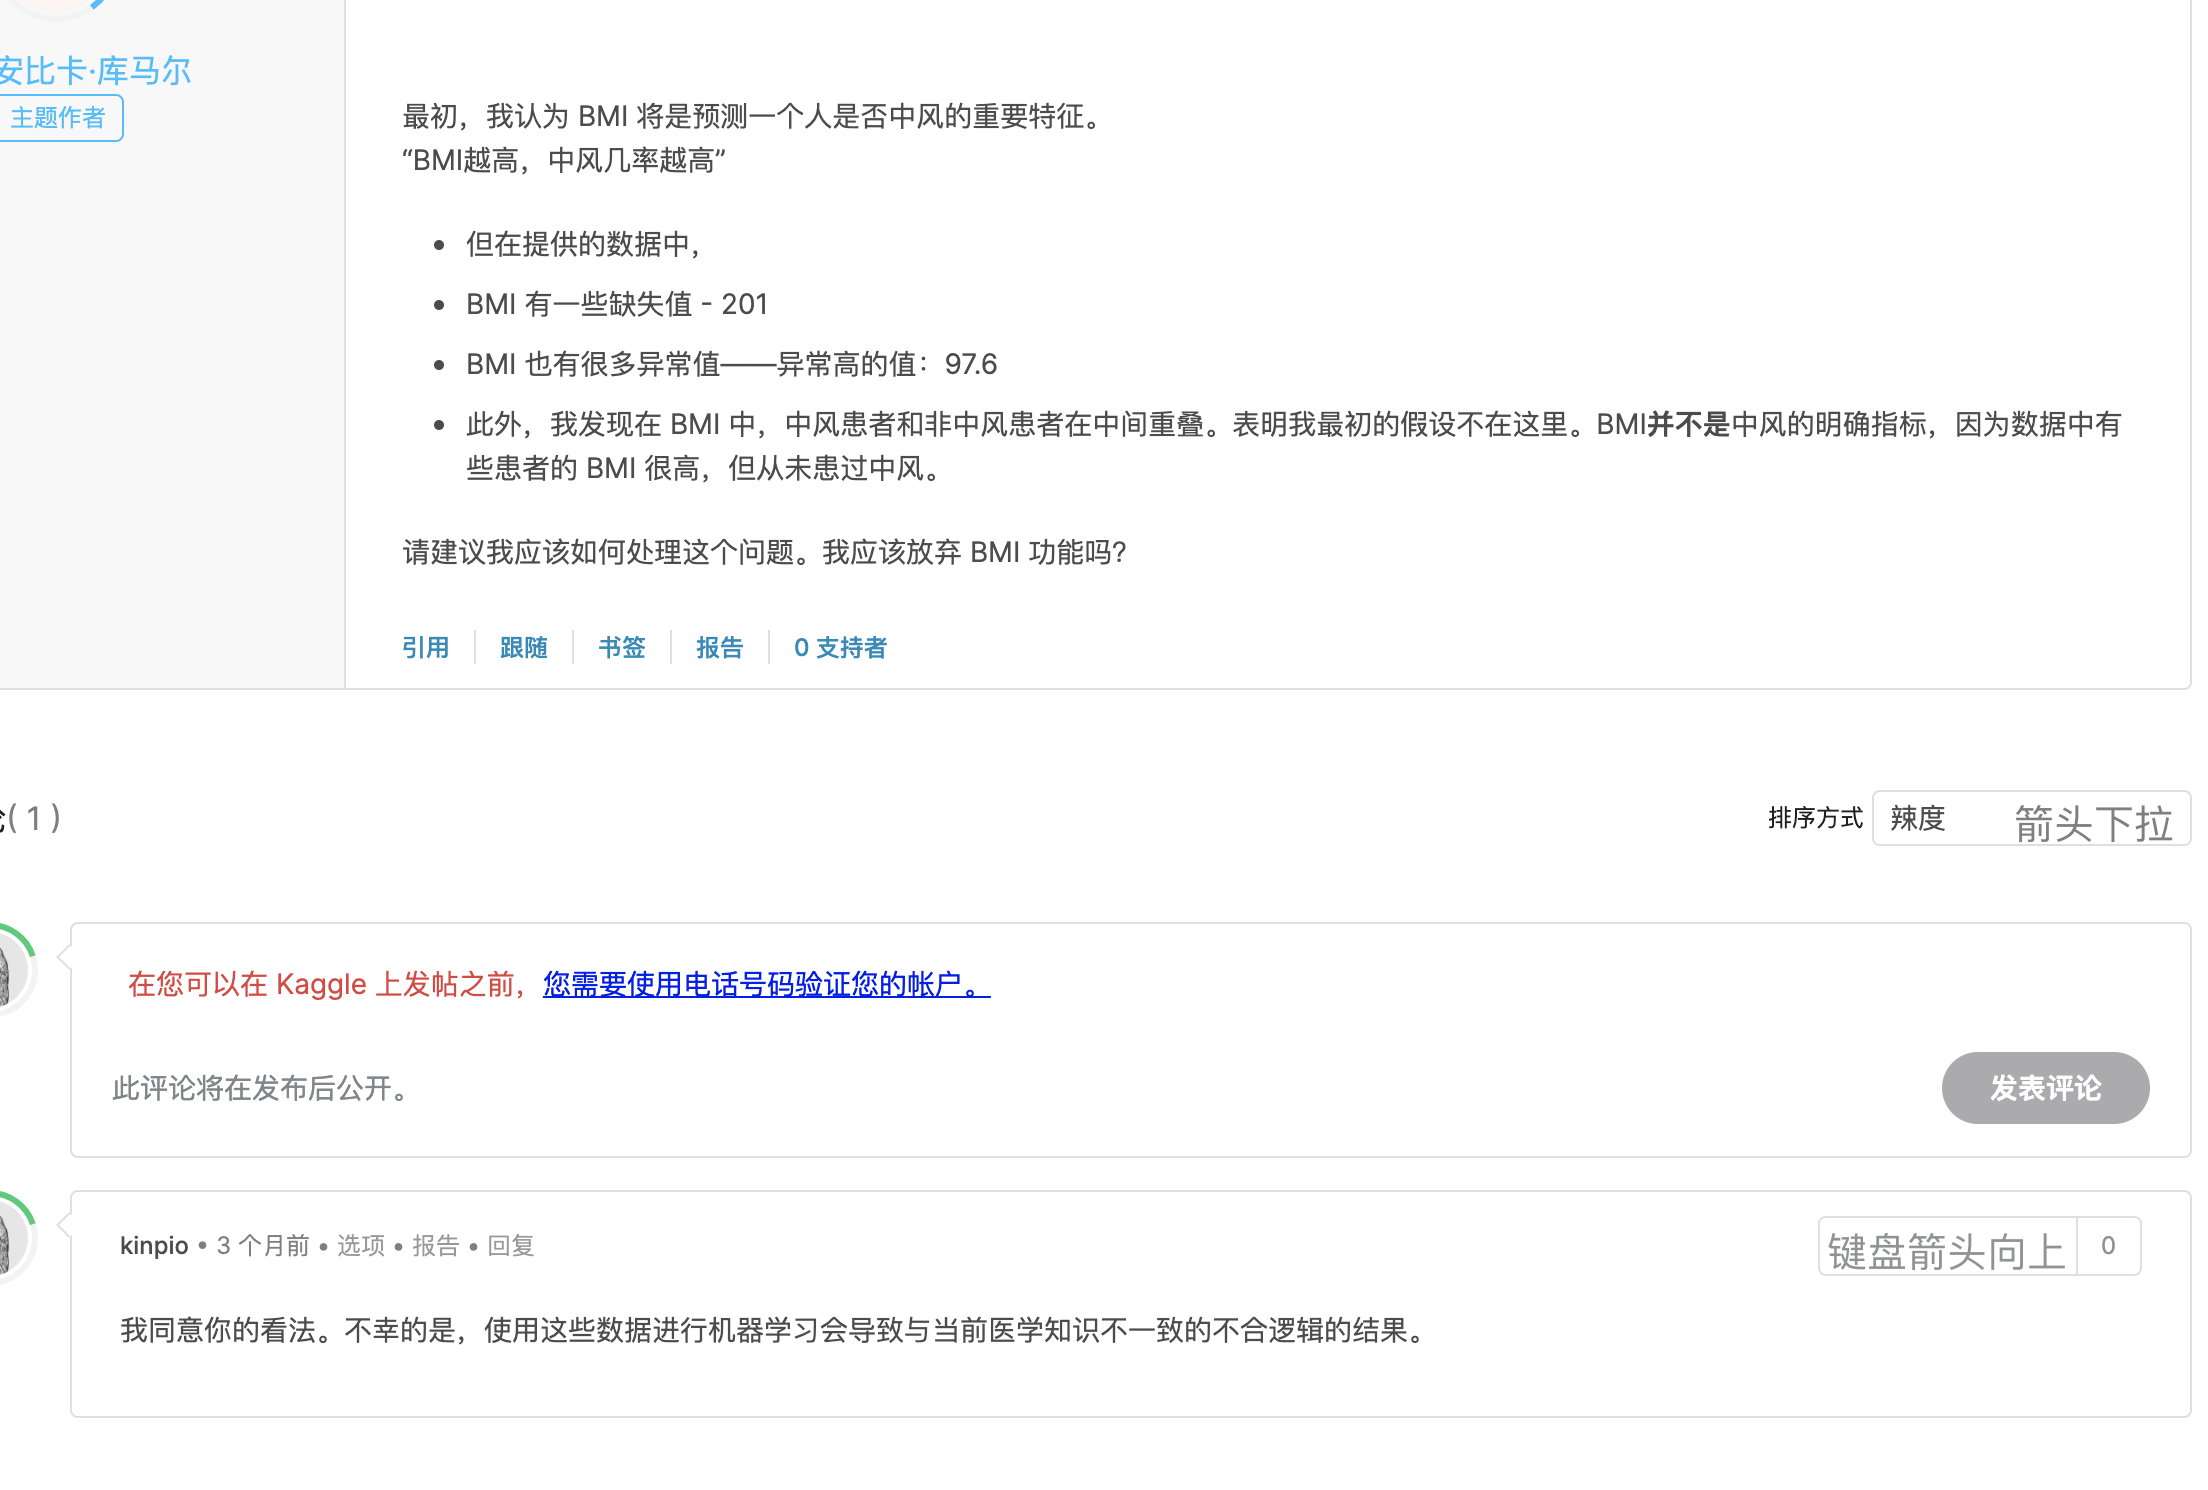

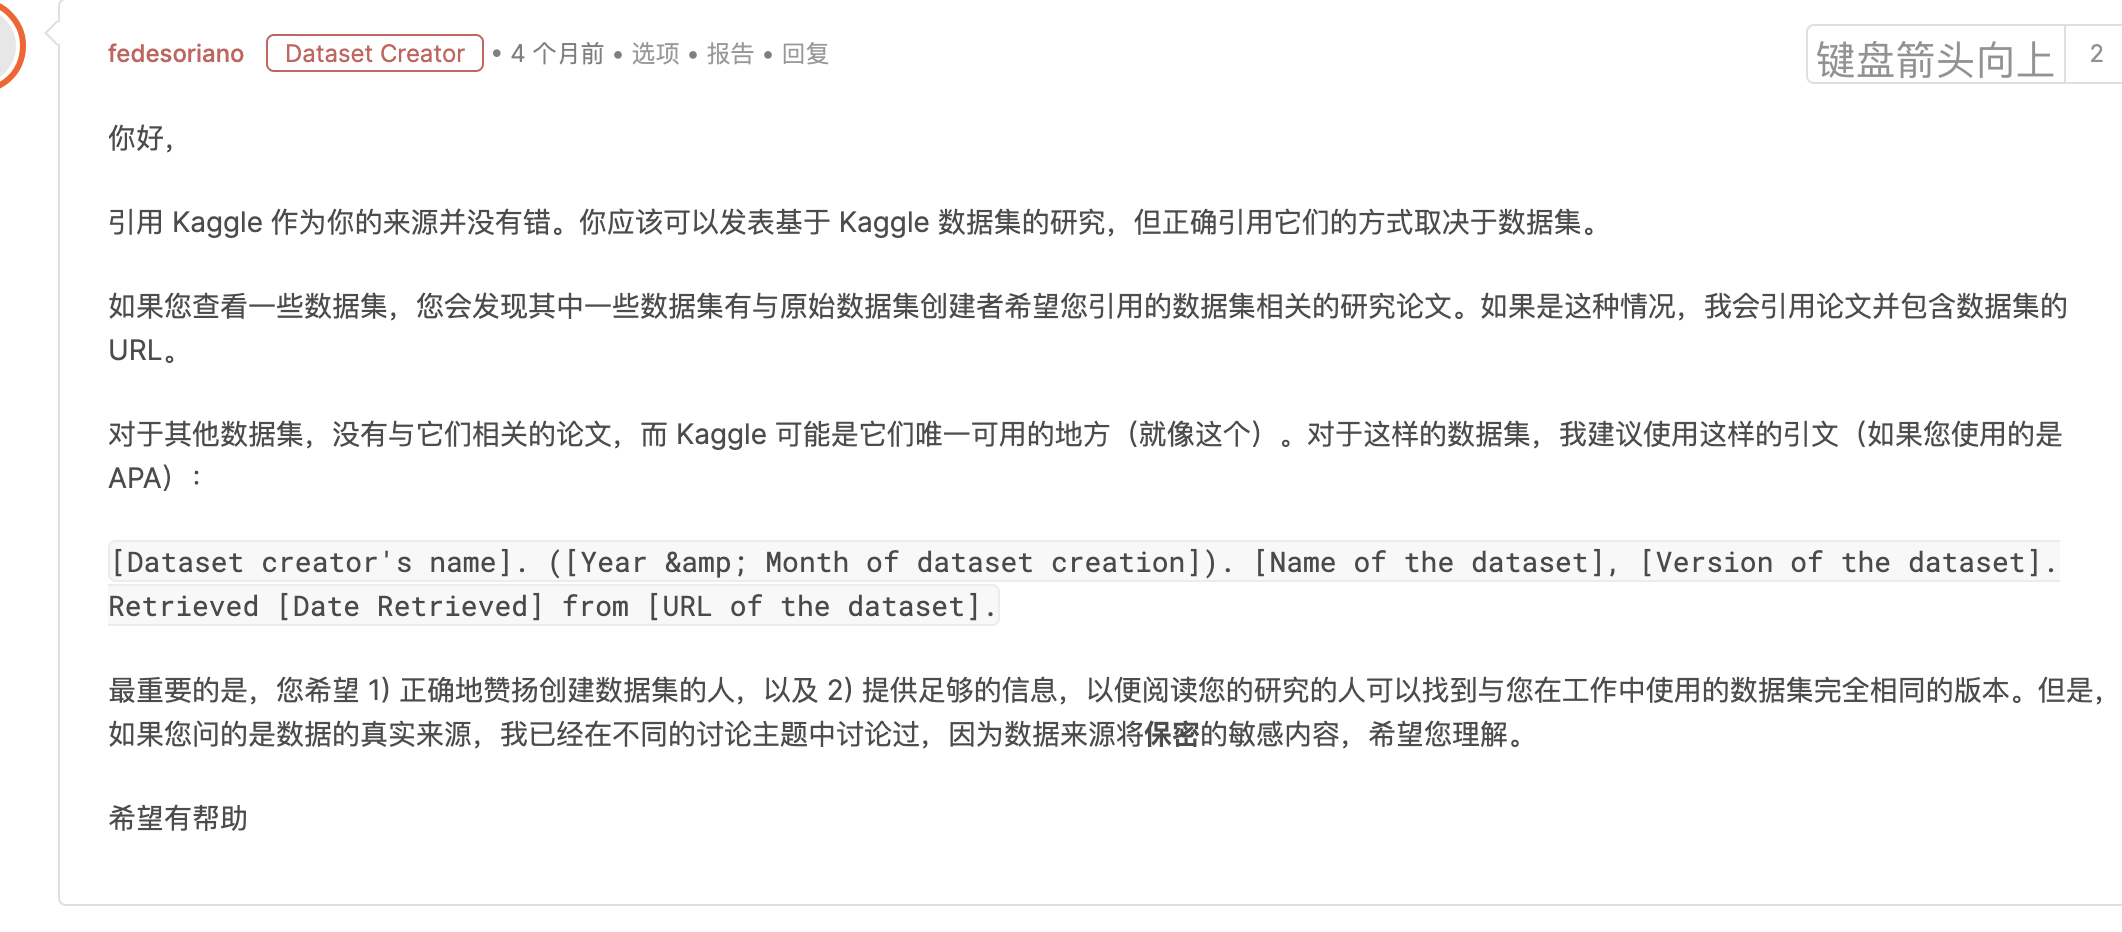

In [ ]:
#引用方法
# [Dataset creator's name]. ([Year &amp; Month of dataset creation]). [Name of the dataset], [Version of the dataset]. Retrieved [Date Retrieved] from [URL of the dataset].

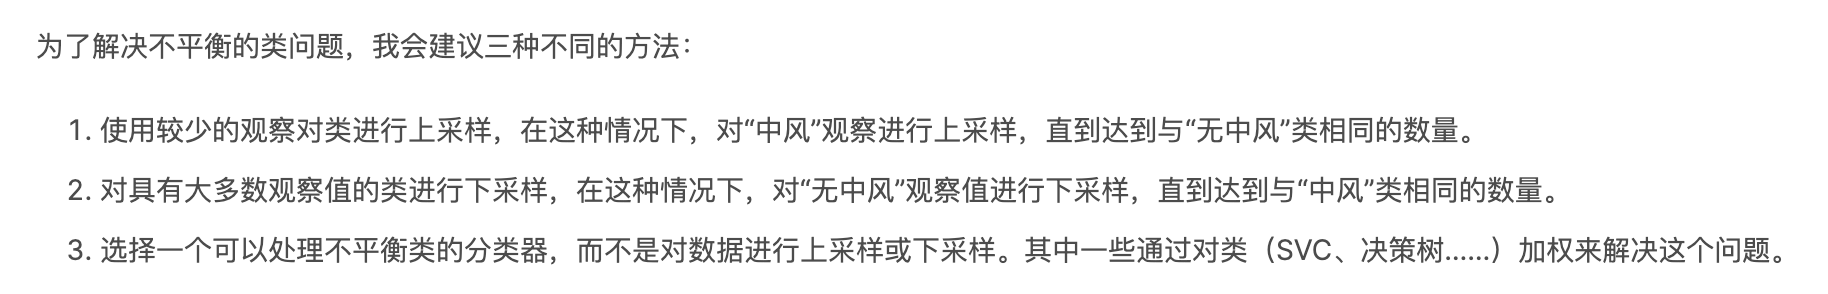

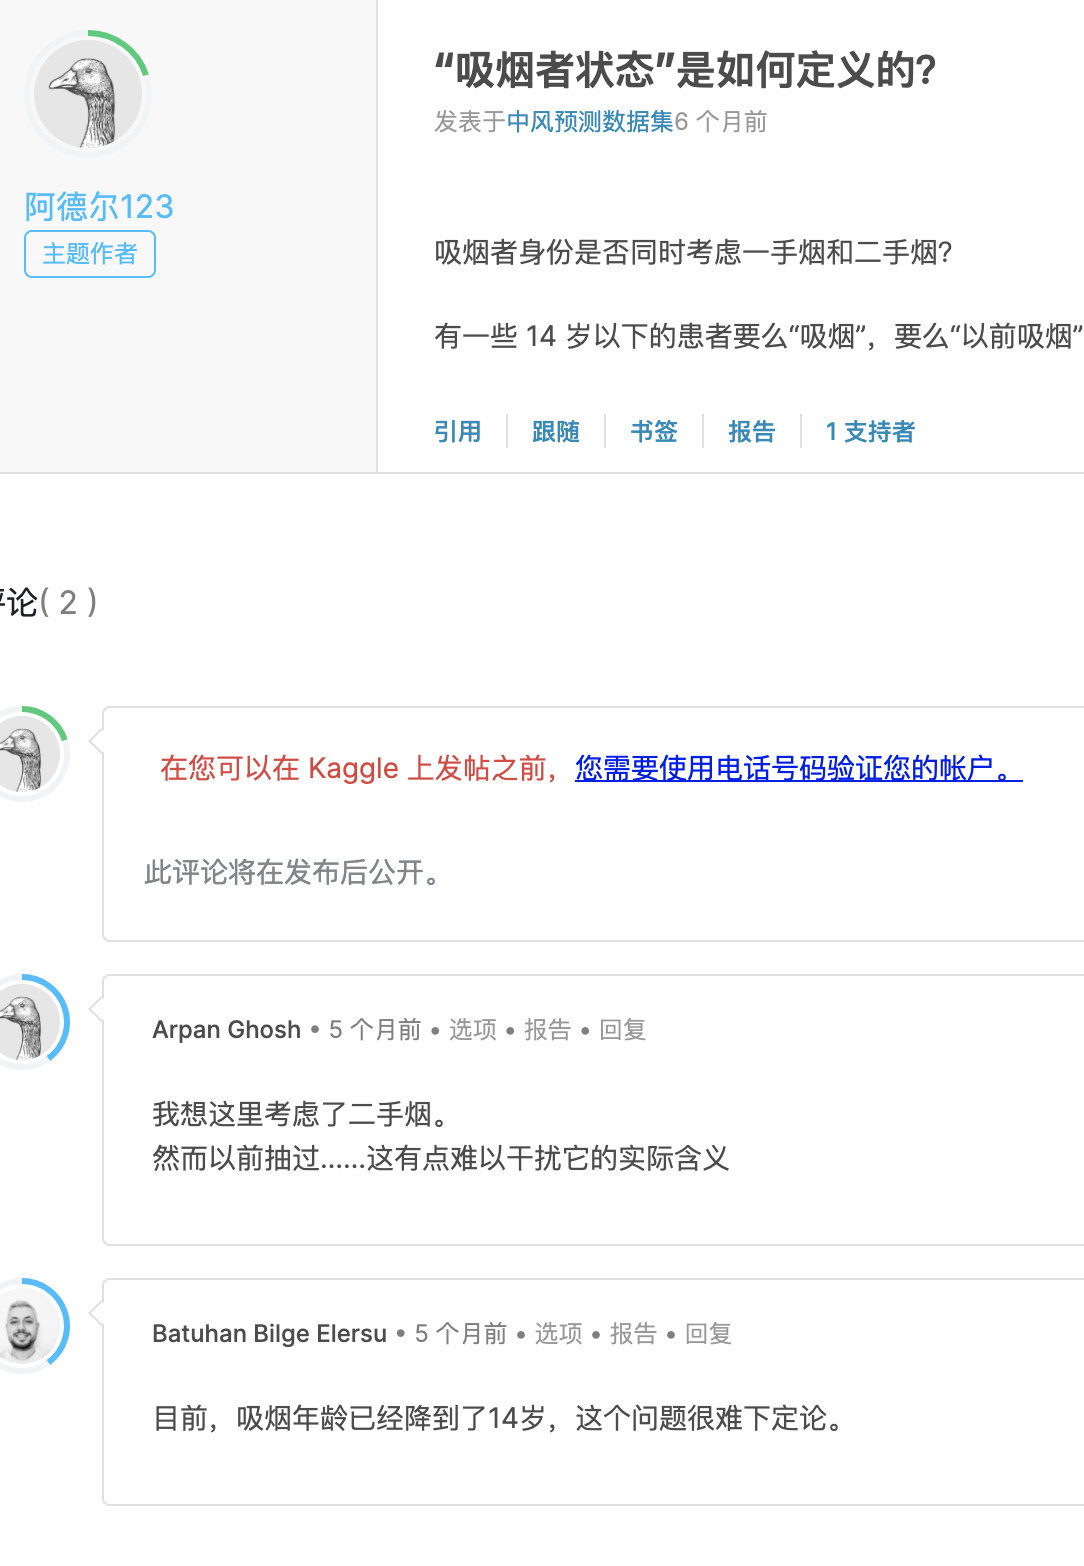